In [9]:
# ! pip3 install -r requirements.txt

# Task 1: Amino acid sequence analysis

# 1
obtain FASTA files of protein sequences of the following 7 species from NCBI Genome Database.
Arabidopsis thaliana
Human
Mouse
Zebrafish
Chlamydomonas (green alga)
Cyanidioschizone (red alga)
Budding yeast

In [10]:
def is_protein_sequence(sequence):
    # Define valid amino acid characters
    valid_amino_acids = set('ARNDCQEGHILKMFPSTWYV')
    
    # Check each character in the sequence
    for char in sequence:
        if char not in valid_amino_acids:
            return False
    return True

sequence = "MDLQHGGAFYSTRIRAAESYEDTAHSAVCIITAGVRQRPGESRLELMDRNAALFKGIIPPLVQYSQNTILLVVSNPVDLLTHLAWQMSGLPRERVIGSGTYLDSSRFRTLLAQRLGIDTASVQAMVLGEHGDSSFVYRSGITVGGVPLRTCFERMTDAASASTAFYDLVKGVHQQVVAAAYEVIKLKGYTNWAIGSAVGSIVTTIVHDRRKVLPITTHAGSLRGLESADVFLSLPCVLGRNGVVEVLQILPFMESDEKEDLQSSIEALQSTPKKAS"
if is_protein_sequence(sequence):
    print("The sequence is a valid protein sequence.")
else:
    print("The sequence is not a valid protein sequence.")


The sequence is a valid protein sequence.


## Attemp to parse fasta

In [11]:
def parse_fasta_file(input_file):
    """
    input_file - fasta
    return - {id:gene_seq} dictionary
    """
    f = open(input_file)

    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None: 
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    # Add the final sequence to the dict
    if curr_seq_id is not None:
        parsed_seqs[curr_seq_id] = ''.join(curr_seq)

    f.close()
    print(len(parsed_seqs))
    return parsed_seqs


In [12]:
input_file = 'assignment01_data/Cyanidioschyzon protein.faa'
temp = parse_fasta_file(input_file)
for i, (key, value) in enumerate(temp.items()):
    if is_protein_sequence(value) == True:
        print(f"{key}: {value}")
        print("Length of Protein Sequence: ", len(value))
    else:
        break

4803
XP_005534764.1 L-lactate dehydrogenase [Cyanidioschyzon merolae strain 10D]: MDLQHGGAFYSTRIRAAESYEDTAHSAVCIITAGVRQRPGESRLELMDRNAALFKGIIPPLVQYSQNTILLVVSNPVDLLTHLAWQMSGLPRERVIGSGTYLDSSRFRTLLAQRLGIDTASVQAMVLGEHGDSSFVYRSGITVGGVPLRTCFERMTDAASASTAFYDLVKGVHQQVVAAAYEVIKLKGYTNWAIGSAVGSIVTTIVHDRRKVLPITTHAGSLRGLESADVFLSLPCVLGRNGVVEVLQILPFMESDEKEDLQSSIEALQSTPKKAS
Length of Protein Sequence:  276
XP_005534765.1 similar to cell surface glycoprotein [Cyanidioschyzon merolae strain 10D]: MFRARSLVRGLVVAVCLLLAATFSVSLVAALSPVSTVSWTWIGGETGRDNPGNYGTLNQTSADSVPGGRYDSAAWVGSSSLVYLFGGVGGGNPYLSYFNDLWTFNLTSHEWTWIGGSSEADQPGVYGTVGTGSPANTPGSRYRSAYWQMDEQHFWLFGGLGYDRNANFGPMNDMWMYDTESRVWTWVSGNDTVNAGTIYGAEGVFGPSYNPGSRGSASFWLGADGTFWLFGGENNLGDSVSDLWSFNPTTLQWAYRGGSQLANQPGNYSAPGVANNSSAPGARIVANTWTDFEGNLWMFGGLGYGDSTAPGQGKLNDLWVYNISQSVWIFIAGNTTINNPGSYGSLGAFAPTSYPGARDSGVSFVDSLGNLLLFGGEGYGNTRESPGDLNDLWVFDMTLGQWAWINGSQNGFALSVYGFLNKTSPSVSPGGRTGSVFWNTSGTDPVMFGGFGYSNTSIPGYLNDVFALSETFFTPTPTPTPTSTPTLTPTITPTATATPTPTLTPTPTPTPTATPTPT

# 2
Proteins are composed of a series of amino acids, but their length and composition vary from protein to protein. Proteins vary in length, but by looking at the distribution of the length of proteins encoded by a given genome, we can understand the overall picture (proteome) of the proteins of that species. Compare the distribution of protein lengths of each species using the following visualization method. Consider whether converting the protein lengths to logarithmic values changes the interpretation.
* Density distribution
* Box-and-whisker plot
* Violin plot

In [13]:
import numpy as np
import pandas as pd



## Data preparation

In [14]:
import os

def parse_fasta_folder(input_folder):
    """
    input_folder - folder containing .faa files
    return - DataFrame with 'Species', 'Protein ID', 'Protein Length'
    """
    parsed_seqs = {}

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.faa'):
            species_name = filename[:-4]  # Assuming species name is the filename without extension
            file_path = os.path.join(input_folder, filename)
            
            with open(file_path) as f:
                curr_seq_id = None
                curr_seq = []

                for line in f:
                    line = line.strip()

                    if line.startswith(">"):
                        if curr_seq_id is not None:
                            parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

                        curr_seq_id = line[1:]
                        curr_seq = []
                        continue

                    curr_seq.append(line)

                # Add the final sequence to the dict
                if curr_seq_id is not None:
                    parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

    print(f"Total sequences parsed: {len(parsed_seqs)}")
    return parsed_seqs


In [15]:
def convert_to_dataframe(parsed_seqs):
    """
    Convert the parsed sequences dictionary to a DataFrame.
    """
    data = []
    for seq_id, (species, seq) in parsed_seqs.items():
        data.append({'Protein ID': seq_id, 'Species': species, 'Protein Length': len(seq)})
    
    return pd.DataFrame(data)

## Visualize

In [16]:
# Specify the folder containing the .faa files
input_folder = 'assignment01_data'

# Parse the folder containing .faa files
parsed_data = parse_fasta_folder(input_folder)
# print(parsed_data)

# Convert to DataFrame
df = convert_to_dataframe(parsed_data)

# Display the DataFrame
df.head()

Total sequences parsed: 365746


Protein ID  \
0  NP_001018029.1 Coq21p [Saccharomyces cerevisia...   
1  NP_001018030.1 L-serine/L-threonine ammonia-ly...   
2  NP_001018031.2 Adf1p [Saccharomyces cerevisiae...   
3  NP_001018032.1 uncharacterized protein YCR095W...   
4  NP_001018033.3 uncharacterized protein YGR161W...   

                            Species  Protein Length  
0  Saccharomyces cerevisiae protein              66  
1  Saccharomyces cerevisiae protein             360  
2  Saccharomyces cerevisiae protein             113  
3  Saccharomyces cerevisiae protein              52  
4  Saccharomyces cerevisiae protein              92

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.
/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/314694824.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species')


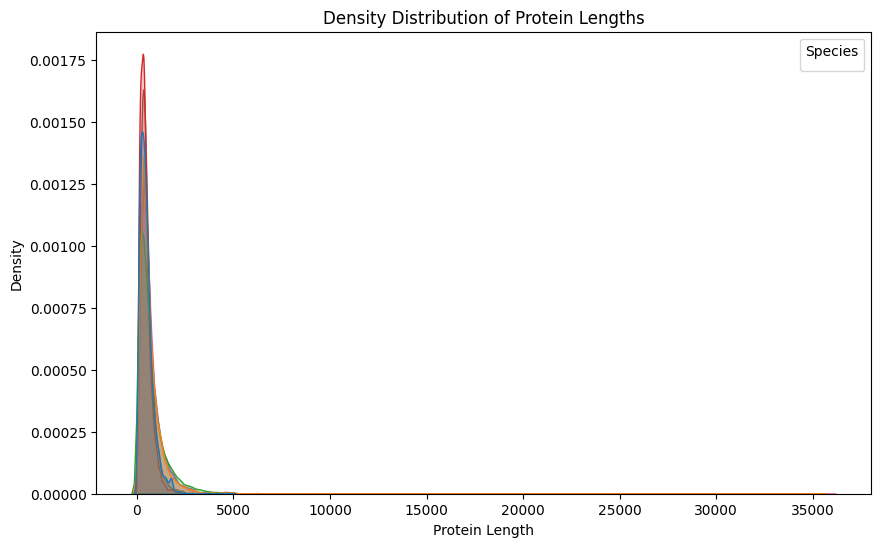

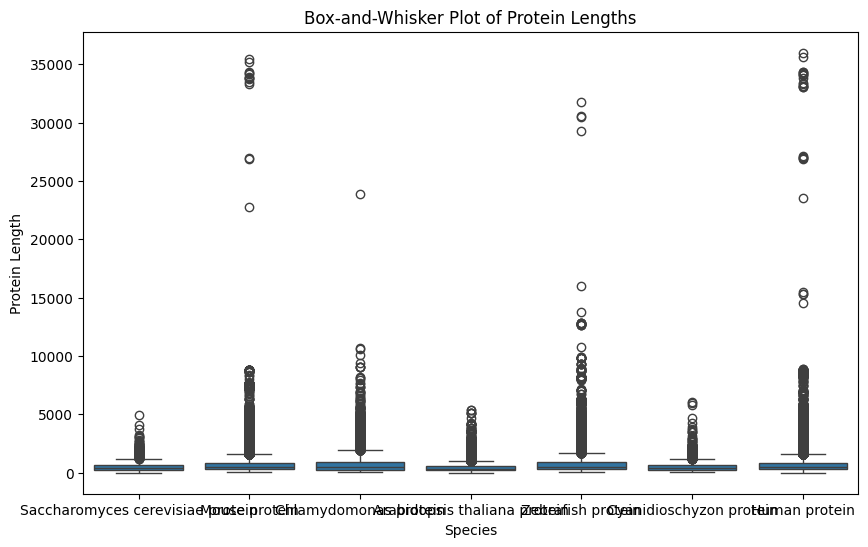

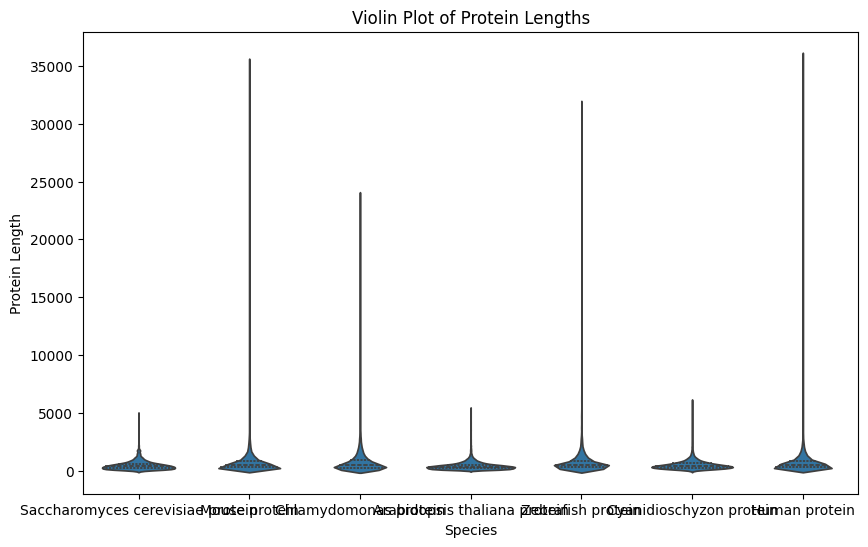

In [17]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Density Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Protein Length', hue='Species', fill=True, common_norm=False)
plt.title('Density Distribution of Protein Lengths')
plt.xlabel('Protein Length')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()

# Box-and-Whisker Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Protein Length')
plt.title('Box-and-Whisker Plot of Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Protein Length')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Species', y='Protein Length', inner='quartile')
plt.title('Violin Plot of Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Protein Length')
plt.show()


### Logarithmic Value

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/1068332703.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species')


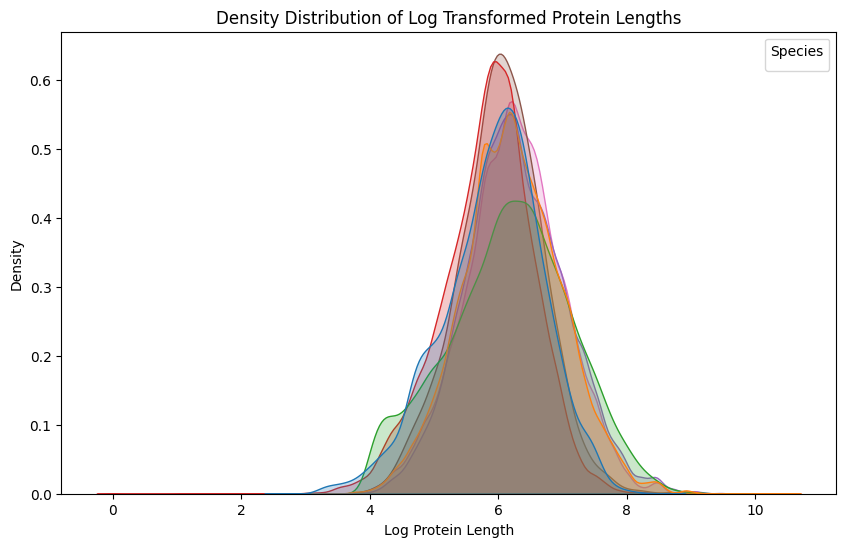

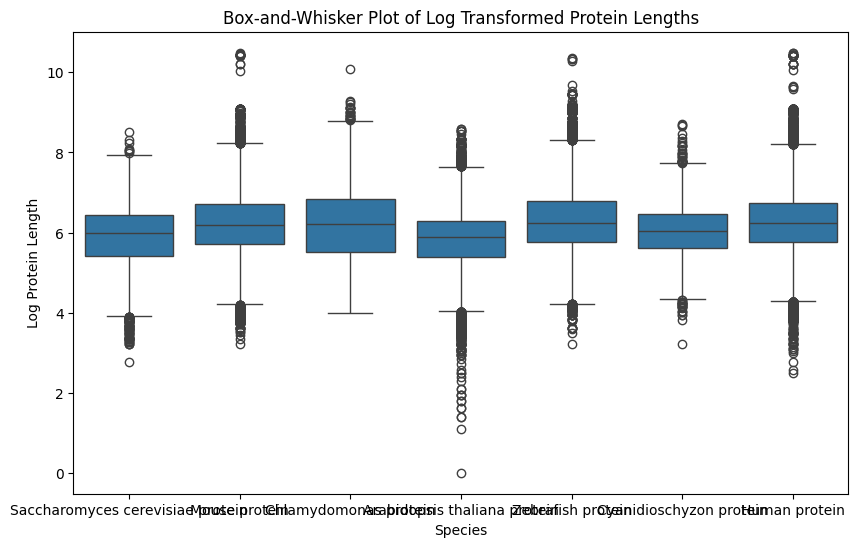

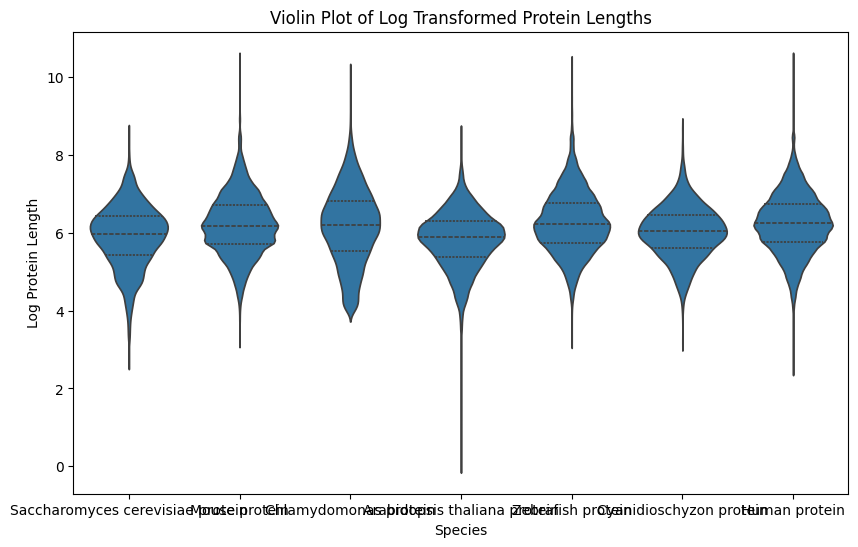

In [18]:

# Apply logarithmic transformation and visualize again if needed
df['Log Protein Length'] = np.log(df['Protein Length'])

# Density Distribution on Log Scale
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Protein Length', hue='Species', fill=True, common_norm=False)
plt.title('Density Distribution of Log Transformed Protein Lengths')
plt.xlabel('Log Protein Length')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()

# Box-and-Whisker Plot on Log Scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Log Protein Length')
plt.title('Box-and-Whisker Plot of Log Transformed Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Log Protein Length')
plt.show()

# Violin Plot on Log Scale
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Species', y='Log Protein Length', inner='quartile')
plt.title('Violin Plot of Log Transformed Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Log Protein Length')
plt.show()

### Make the plots easier to read

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


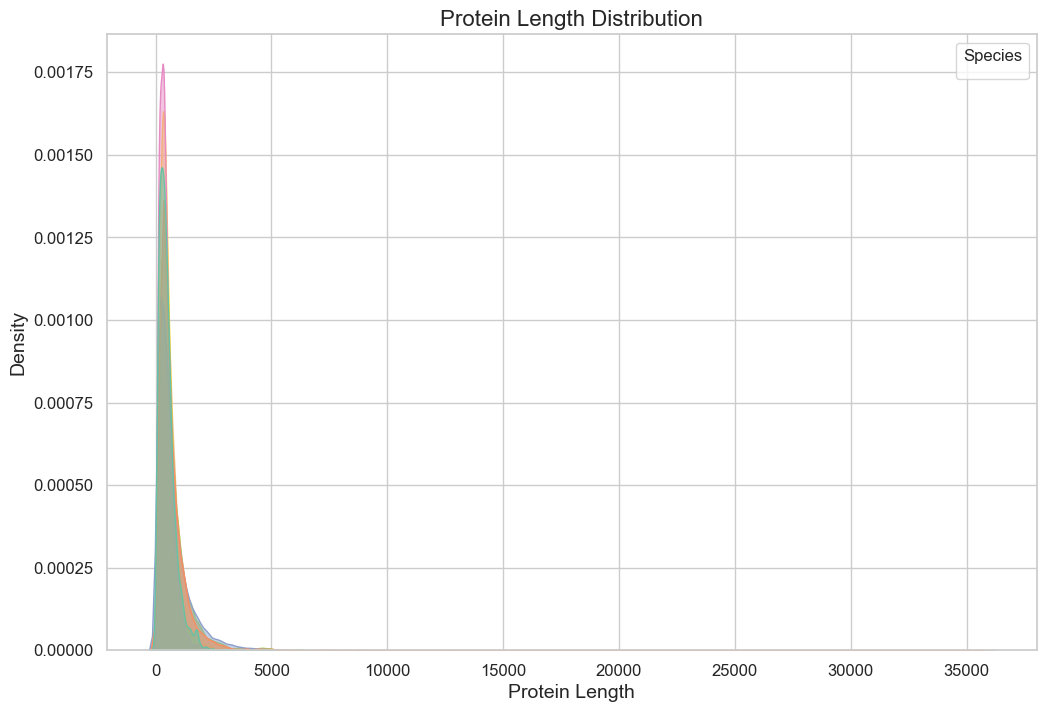

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


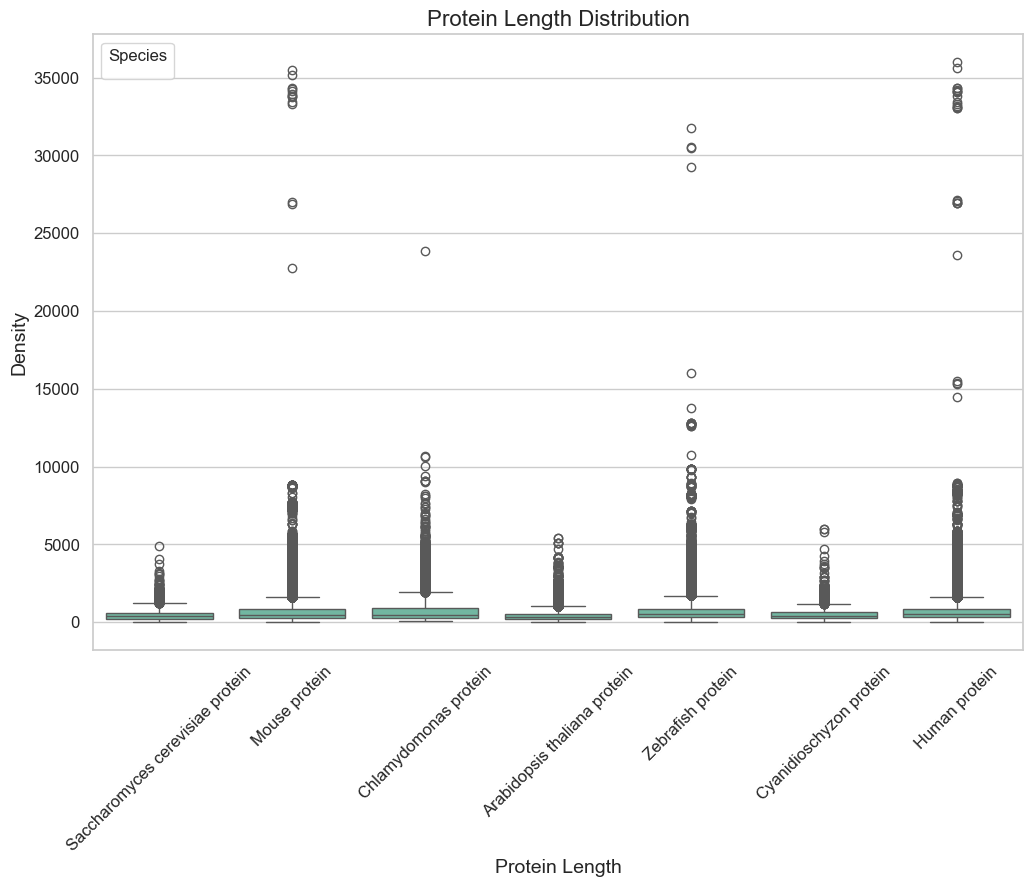

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


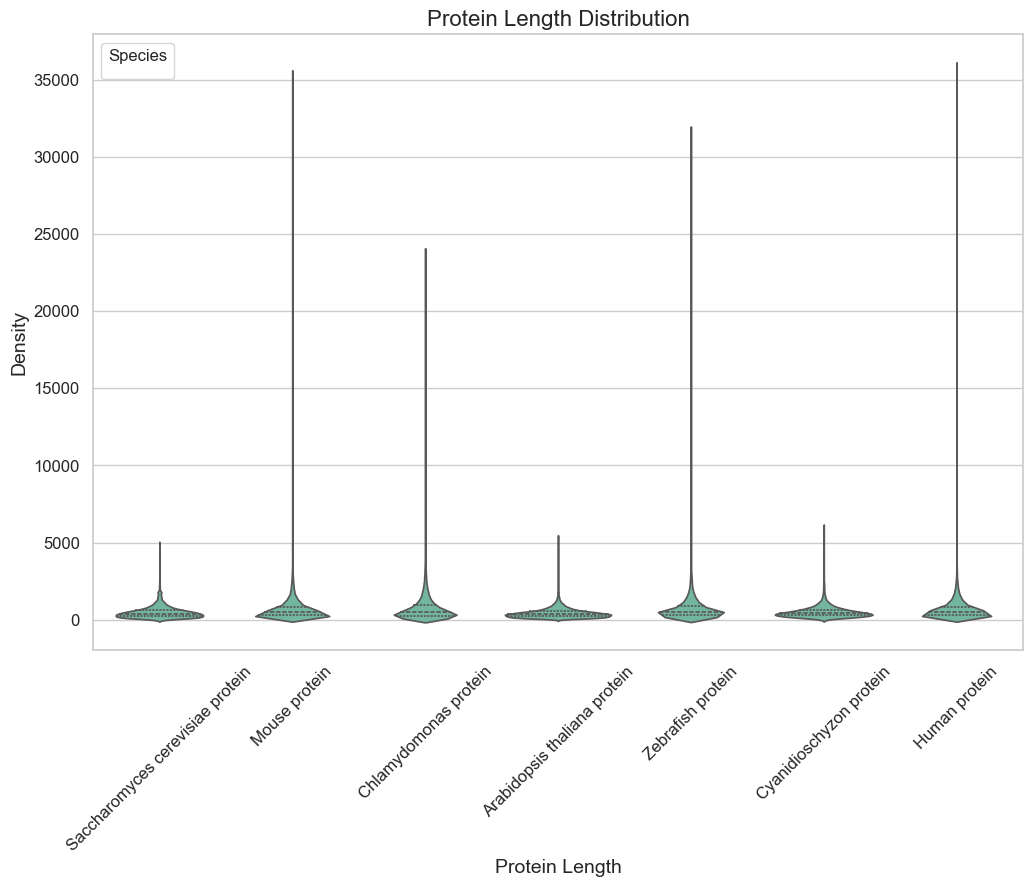

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


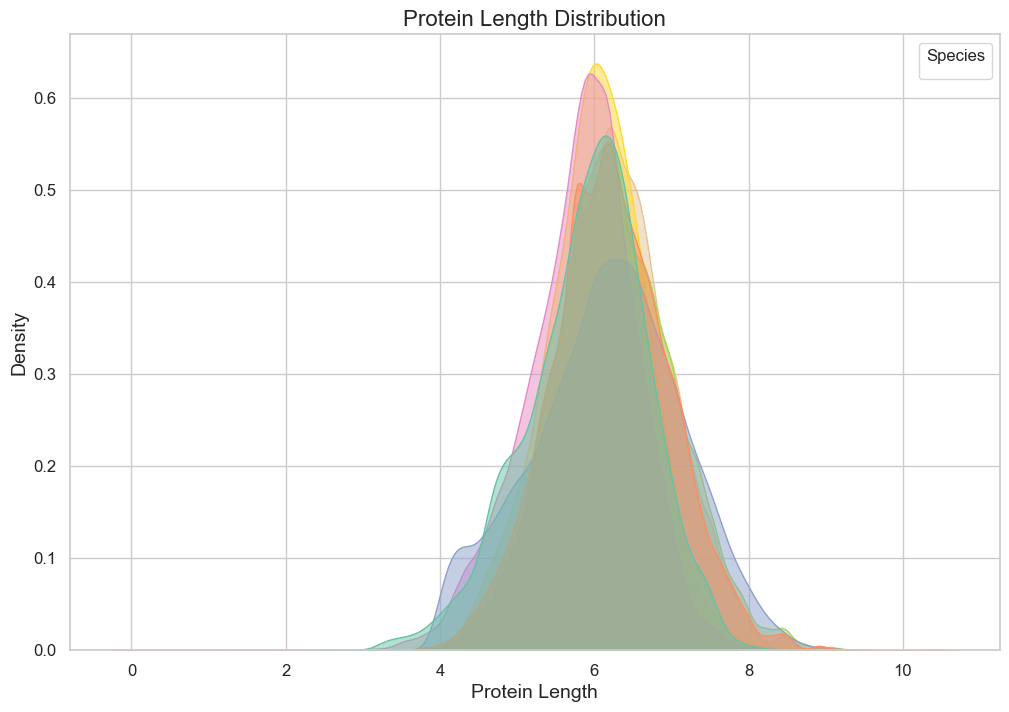

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


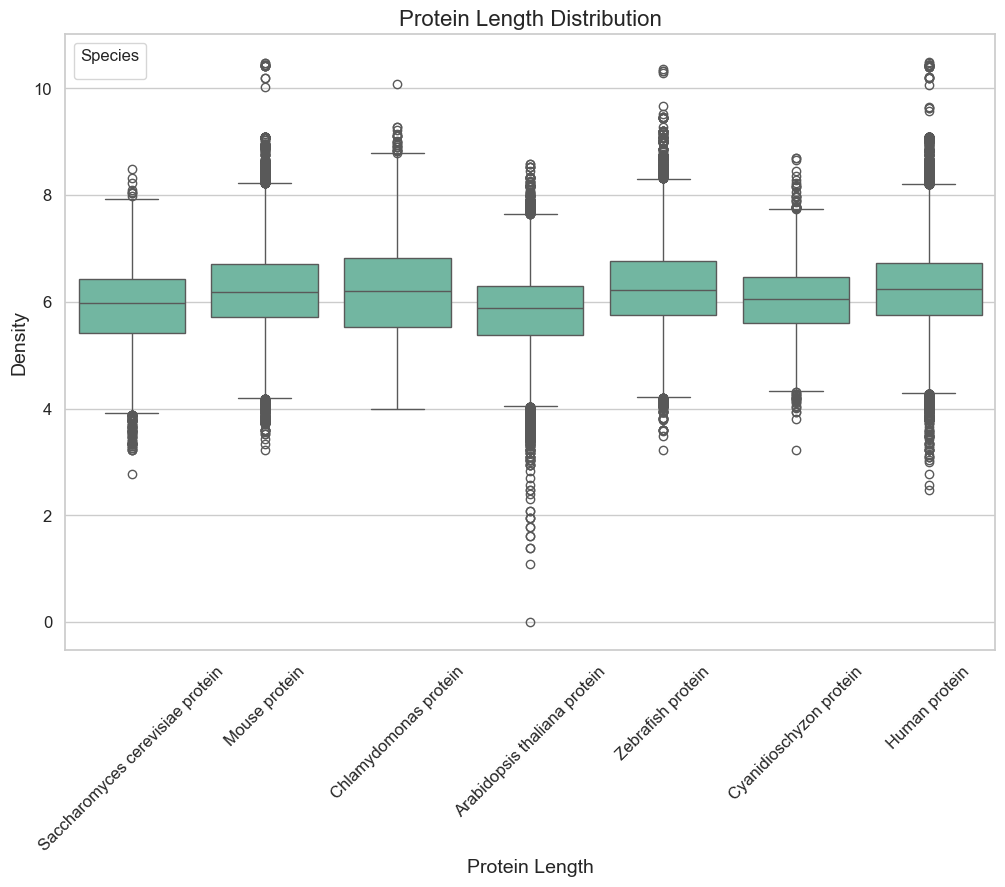

/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_4837/3775919700.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


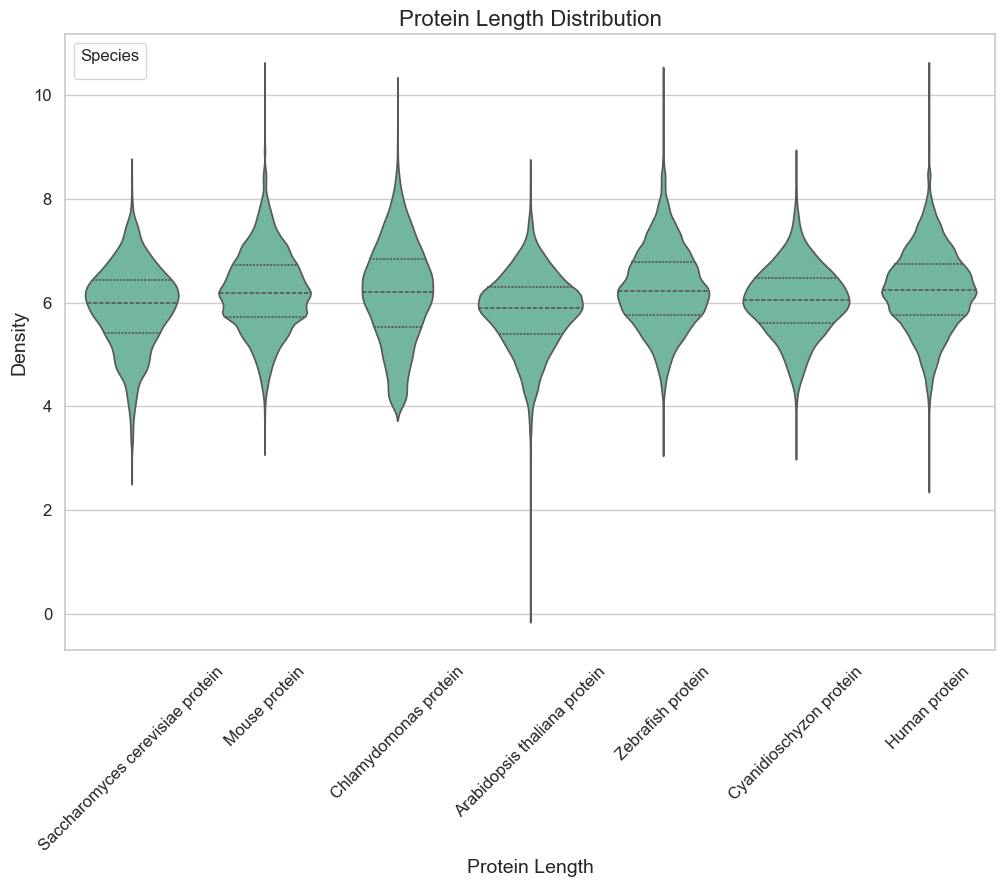

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style and palette
sns.set(style='whitegrid', palette='Set2')

# Adjusting the plot aesthetics
def pretty_plot():
    plt.title('Protein Length Distribution', fontsize=16)
    plt.xlabel('Protein Length', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# Density Distribution Plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Protein Length', hue='Species', fill=True, alpha=0.5, common_norm=False)
pretty_plot()
plt.legend(title='Species', fontsize=12)
plt.show()

# Box-and-Whisker Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Species', y='Protein Length')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Species', y='Protein Length', inner='quartile')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Logarithmic transformation and visualizations
df['Log Protein Length'] = np.log(df['Protein Length'])

# Density Distribution on Log Scale
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Log Protein Length', hue='Species', fill=True, alpha=0.5, common_norm=False)
pretty_plot()
plt.legend(title='Species', fontsize=12)
plt.show()

# Box-and-Whisker Plot on Log Scale
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Species', y='Log Protein Length')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Violin Plot on Log Scale
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Species', y='Log Protein Length', inner='quartile')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()


# 3 Amino acid composision

Modify the parsing code

In [2]:
import os
import pandas as pd
from collections import Counter

def parse_fasta_folder(input_folder):
    """
    Parses .faa files from the input folder and returns a DataFrame with sequences and their lengths.
    """
    parsed_seqs = {}

    for filename in os.listdir(input_folder):
        if filename.endswith('.faa'):
            species_name = filename[:-4]  # Assuming species name is the filename without extension
            file_path = os.path.join(input_folder, filename)
            
            with open(file_path) as f:
                curr_seq_id = None
                curr_seq = []

                for line in f:
                    line = line.strip()

                    if line.startswith(">"):
                        if curr_seq_id is not None:
                            parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

                        curr_seq_id = line[1:]
                        curr_seq = []
                        continue

                    curr_seq.append(line)

                if curr_seq_id is not None:
                    parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

    print(f"Total sequences parsed: {len(parsed_seqs)}")
    
    # Convert to DataFrame
    data = []
    for seq_id, (species, seq) in parsed_seqs.items():
        data.append({'Protein ID': seq_id, 'Species': species, 'Protein Sequence': seq})
    
    return pd.DataFrame(data)

# Specify the folder containing the .faa files
input_folder = 'assignment01_data'  # Replace with your folder path
df = parse_fasta_folder(input_folder)


Total sequences parsed: 365746


In [3]:
def calculate_amino_acid_composition(df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # The 20 amino acids
    compositions = {aa: [] for aa in amino_acids}

    for seq in df['Protein Sequence']:
        total_length = len(seq)
        counts = Counter(seq)
        
        for aa in amino_acids:
            compositions[aa].append(counts[aa] / total_length if total_length > 0 else 0)

    return pd.DataFrame(compositions)

# Calculate protein lengths
df['Protein Length'] = df['Protein Sequence'].apply(len)

# Calculate amino acid compositions
composition_df = calculate_amino_acid_composition(df)
composition_df['Protein Length'] = df['Protein Length']
composition_df['Species'] = df['Species']


In [22]:
composition_df.head()

A         C         D         E         F         G         H  \
0  0.166667  0.030303  0.015152  0.060606  0.015152  0.015152  0.000000   
1  0.075000  0.022222  0.047222  0.044444  0.041667  0.077778  0.016667   
2  0.044248  0.008850  0.026549  0.106195  0.008850  0.053097  0.000000   
3  0.019231  0.019231  0.000000  0.019231  0.115385  0.038462  0.057692   
4  0.076087  0.010870  0.054348  0.054348  0.065217  0.086957  0.032609   

          I         K         L  ...         P         Q         R         S  \
0  0.000000  0.060606  0.060606  ...  0.000000  0.045455  0.121212  0.106061   
1  0.097222  0.080556  0.063889  ...  0.038889  0.041667  0.033333  0.075000   
2  0.053097  0.194690  0.079646  ...  0.017699  0.053097  0.053097  0.097345   
3  0.076923  0.173077  0.115385  ...  0.000000  0.000000  0.057692  0.076923   
4  0.043478  0.032609  0.108696  ...  0.021739  0.076087  0.021739  0.130435   

          T         V         W         Y  Protein Length  \
0  0.030303  0.090909  0.045455  0.045455              66   
1  0.055556  0.080556  0.005556  0.027778             360   
2  0.079646  0.053097  0.000000  0.000000             113   
3  0.038462  0.076923  0.000000  0.057692              52   
4  0.065217  0.010870  0.010870  0.010870              92   

                            Species  
0  Saccharomyces cerevisiae protein  
1  Saccharomyces cerevisiae protein  
2  Saccharomyces cerevisiae protein  
3  Saccharomyces cerevisiae protein  
4  Saccharomyces cerevisiae protein  

[5 rows x 22 columns]

## Visualize

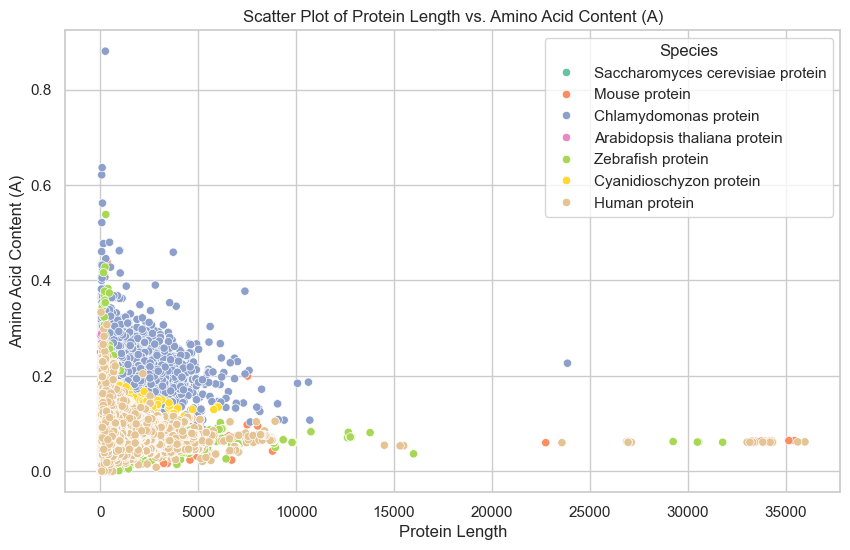

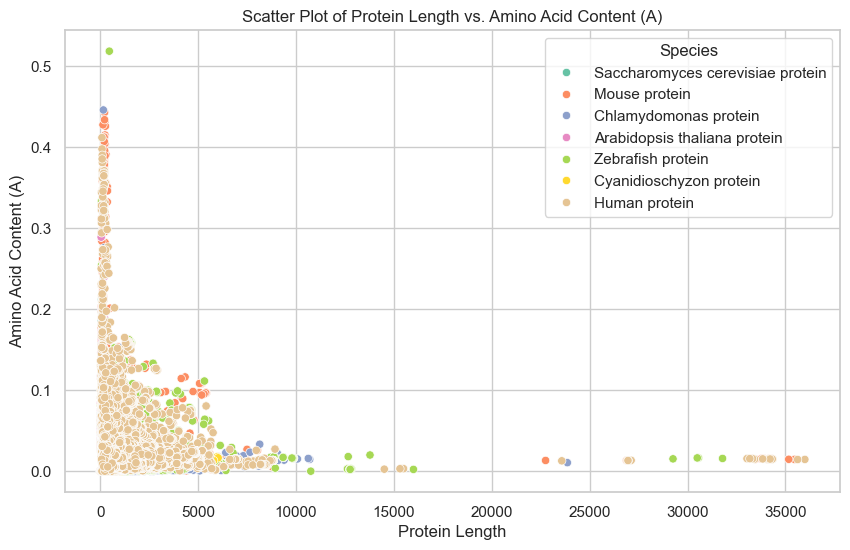

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for amino acid 'A'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='A', hue='Species')
plt.title('Scatter Plot of Protein Length vs. Amino Acid Content (A)')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.show()

# Example for amino acid 'A'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='C', hue='Species')
plt.title('Scatter Plot of Protein Length vs. Amino Acid Content (A)')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.show()


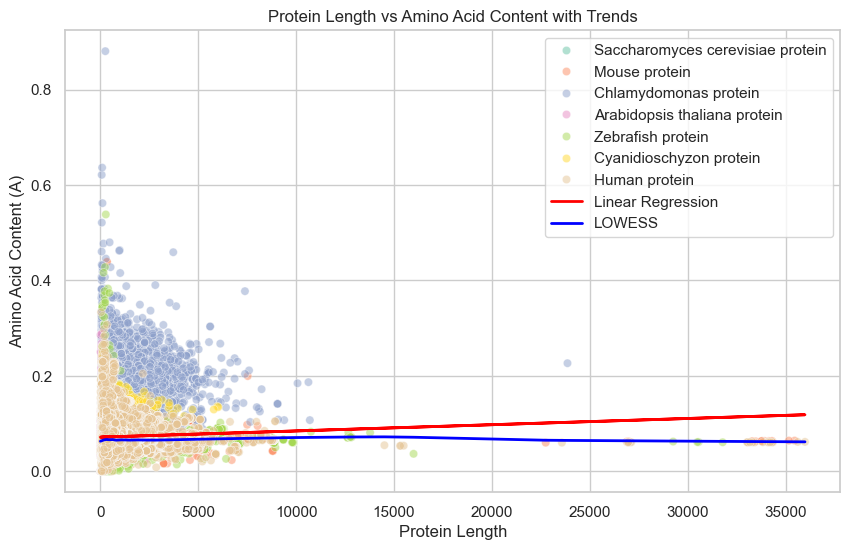

In [24]:
import statsmodels.api as sm

# Linear regression
x = composition_df['Protein Length']
y = composition_df['A']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# LOWESS
lowess = sm.nonparametric.lowess(y, x, frac=0.3)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='A', hue='Species', alpha=0.5)
plt.plot(x, predictions, color='red', label='Linear Regression', lw=2)
plt.plot(lowess[:, 0], lowess[:, 1], color='blue', label='LOWESS', lw=2)
plt.title('Protein Length vs Amino Acid Content with Trends')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.legend()
plt.show()


## Visualize method 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_amino_acid_vs_length(composition_df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    
    for aa in amino_acids:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='Protein Length', y=aa, data=composition_df)
        plt.title(f"Scatter plot of {aa} Composition vs Protein Length")
        plt.xlabel("Protein Length")
        plt.ylabel(f"Proportion of {aa}")
        plt.show()

scatter_plot_amino_acid_vs_length(composition_df)


In [ ]:
def scatter_with_trend(composition_df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    
    for aa in amino_acids:
        plt.figure(figsize=(8, 6))
        sns.regplot(x='Protein Length', y=aa, data=composition_df, scatter_kws={"s": 5}, lowess=True)
        plt.title(f"{aa} Composition vs Protein Length with Trend")
        plt.xlabel("Protein Length")
        plt.ylabel(f"Proportion of {aa}")
        plt.show()

scatter_with_trend(composition_df)


Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'Protein Length', 'Species'],
      dtype='object')


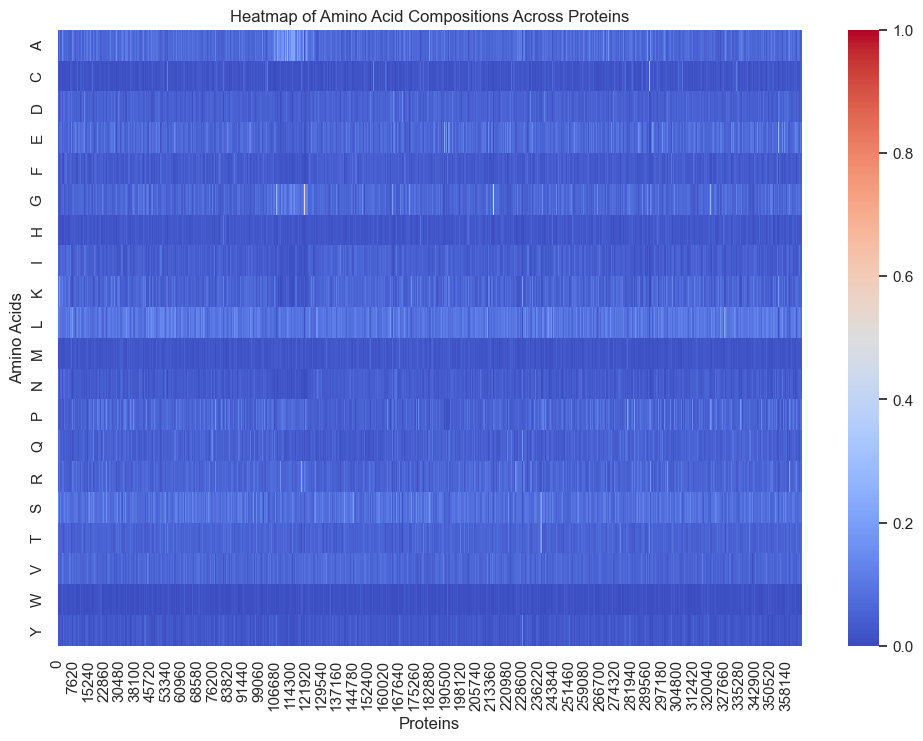

In [33]:
# Check the actual column names in your DataFrame
print(composition_df.columns)

# Adjust the heatmap code to reference the correct columns
def plot_heatmap(composition_df):
    # Adjust based on actual columns, assuming they are the 20 amino acids
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids
    
    # Make sure the columns are present in the DataFrame
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if available_amino_acids:
        plt.figure(figsize=(12, 8))
        sns.heatmap(composition_df[available_amino_acids].T, cmap="coolwarm", cbar=True)
        plt.title("Heatmap of Amino Acid Compositions Across Proteins")
        plt.ylabel("Amino Acids")
        plt.xlabel("Proteins")
        plt.show()
    else:
        print("Amino acid columns not found in the DataFrame.")

plot_heatmap(composition_df)


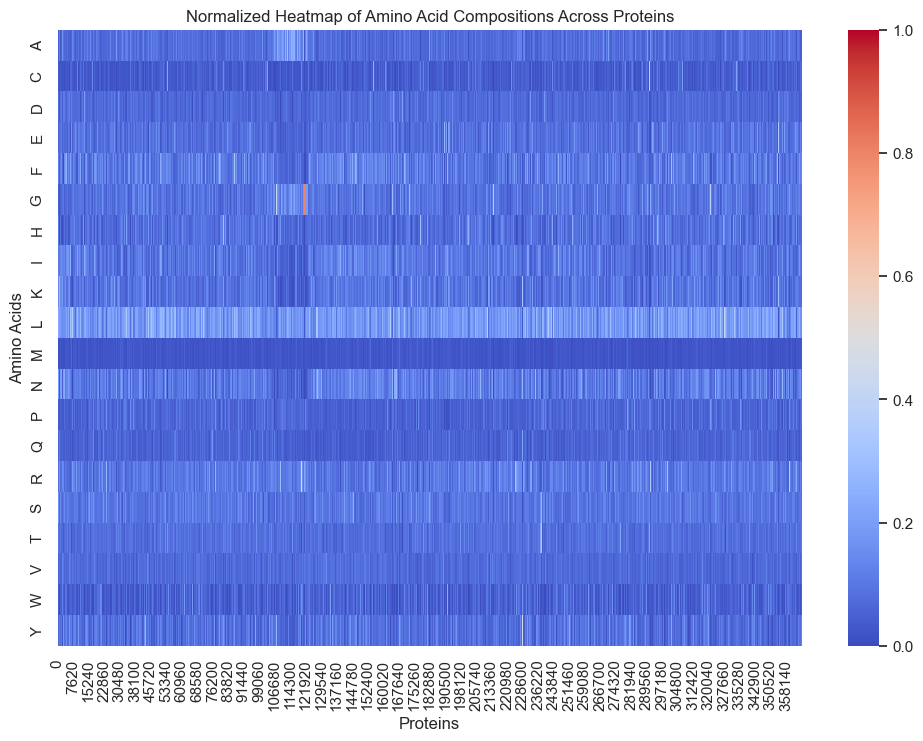

In [38]:
from sklearn.preprocessing import MinMaxScaler

def normalize_composition(composition_df):
    # Select amino acid columns (adjust if needed based on actual DataFrame)
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')
    
    # Ensure we're working with the available columns
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]
    
    # Min-Max normalization (values between 0 and 1)
    scaler = MinMaxScaler()
    composition_df[available_amino_acids] = scaler.fit_transform(composition_df[available_amino_acids])
    
    return composition_df, available_amino_acids

def plot_normalized_heatmap(composition_df):
    # Normalize the composition
    normalized_df, available_amino_acids = normalize_composition(composition_df)

    if available_amino_acids:
        plt.figure(figsize=(12, 8))
        sns.heatmap(normalized_df[available_amino_acids].T, cmap="coolwarm", cbar=True)
        plt.title("Normalized Heatmap of Amino Acid Compositions Across Proteins")
        plt.ylabel("Amino Acids")
        plt.xlabel("Proteins")
        plt.show()
    else:
        print("Amino acid columns not found in the DataFrame.")

# Plot the normalized heatmap
plot_normalized_heatmap(composition_df)


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_hierarchical_clustering(composition_df):
    amino_acid_columns = 'ACDEFGHIKLMNPQRSTVWY'
    linkage_matrix = linkage(composition_df[amino_acid_columns], method='ward')
    
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=composition_df['Species'].values)
    plt.title("Hierarchical Clustering of Proteins Based on Amino Acid Composition")
    plt.show()

plot_hierarchical_clustering(composition_df)


KeyError: 'ACDEFGHIKLMNPQRSTVWY'

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(composition_df):
    amino_acid_columns = 'ACDEFGHIKLMNPQRSTVWY'
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(composition_df[amino_acid_columns])
    
    pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
    pca_df['Species'] = composition_df['Species']

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df)
    plt.title("PCA of Amino Acid Composition Profiles")
    plt.show()

plot_pca(composition_df)


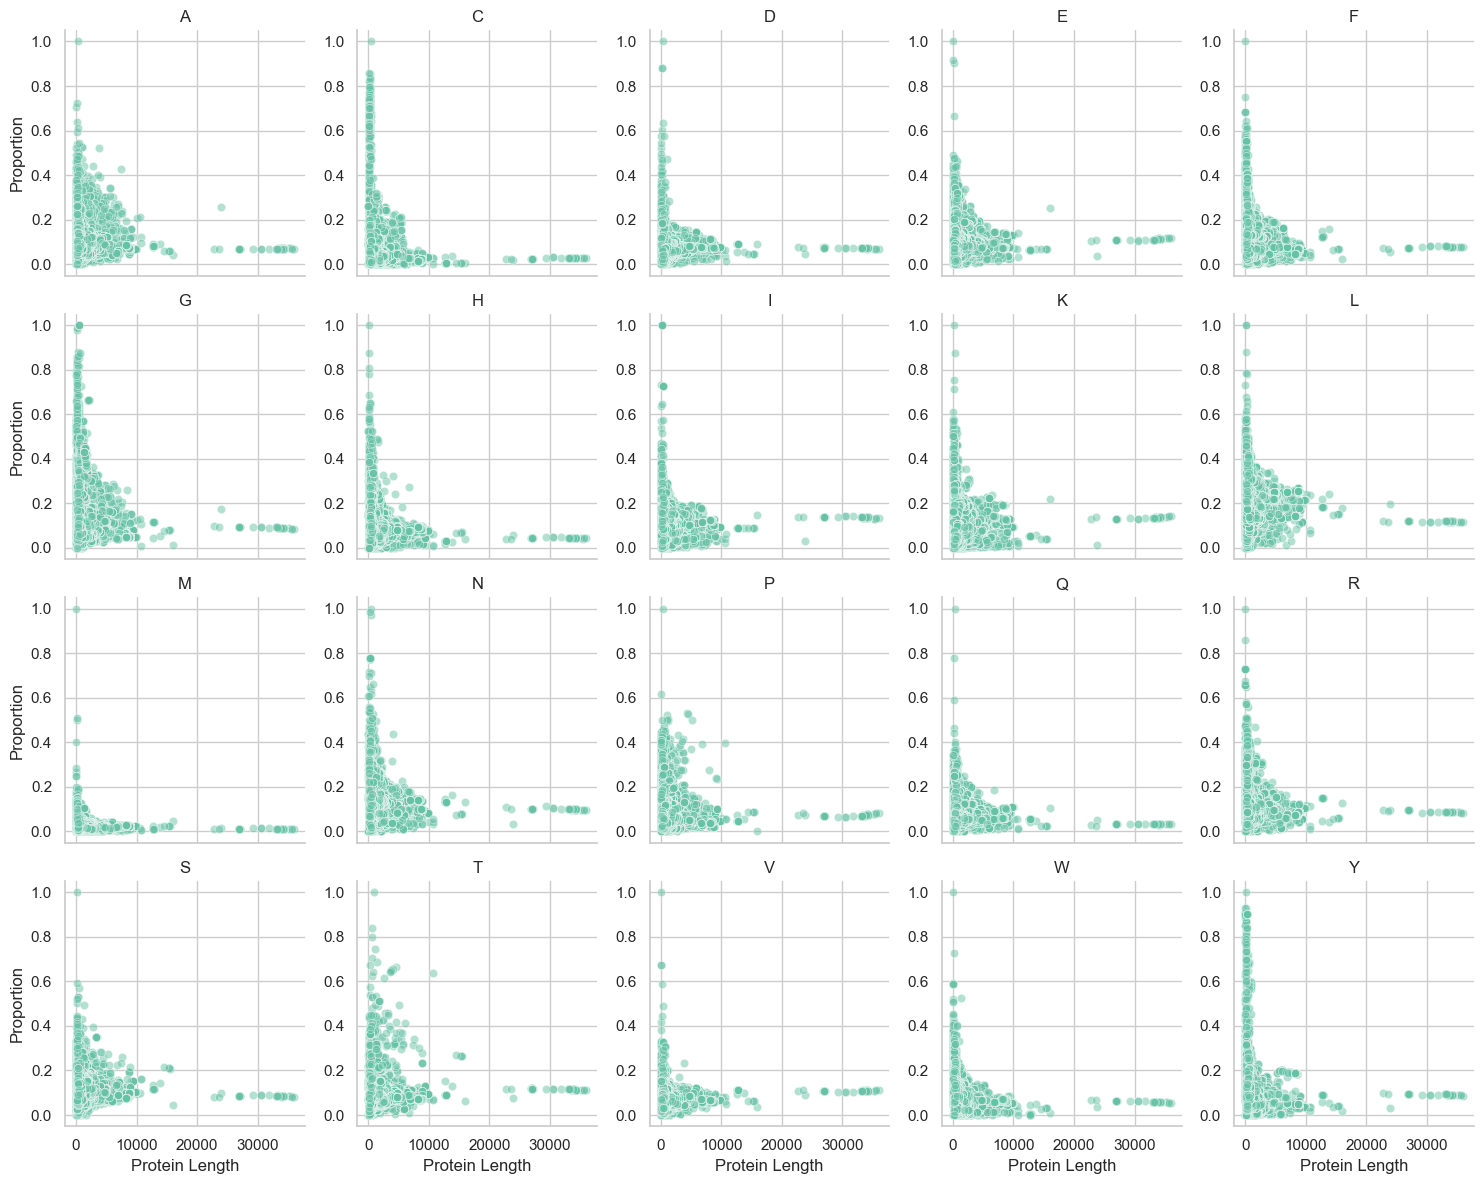

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_facet_grid(composition_df):
    # Check the actual amino acid columns present in the DataFrame
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # Expected amino acids
    
    # Ensure we only include the columns that are actually present in the DataFrame
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]
    
    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return

    # Melt the DataFrame for easier plotting
    melted_df = composition_df.melt(id_vars=['Protein Length'], 
                                    value_vars=available_amino_acids, 
                                    var_name='Amino Acid', 
                                    value_name='Proportion')

    # Create the facet grid
    g = sns.FacetGrid(melted_df, col='Amino Acid', col_wrap=5, height=3, sharey=False)
    g.map(sns.scatterplot, 'Protein Length', 'Proportion', alpha=0.5)
    g.set_titles("{col_name}")
    g.set_axis_labels("Protein Length", "Proportion")
    
    plt.tight_layout()
    plt.show()

# Run the updated facet grid function
scatter_facet_grid(composition_df)


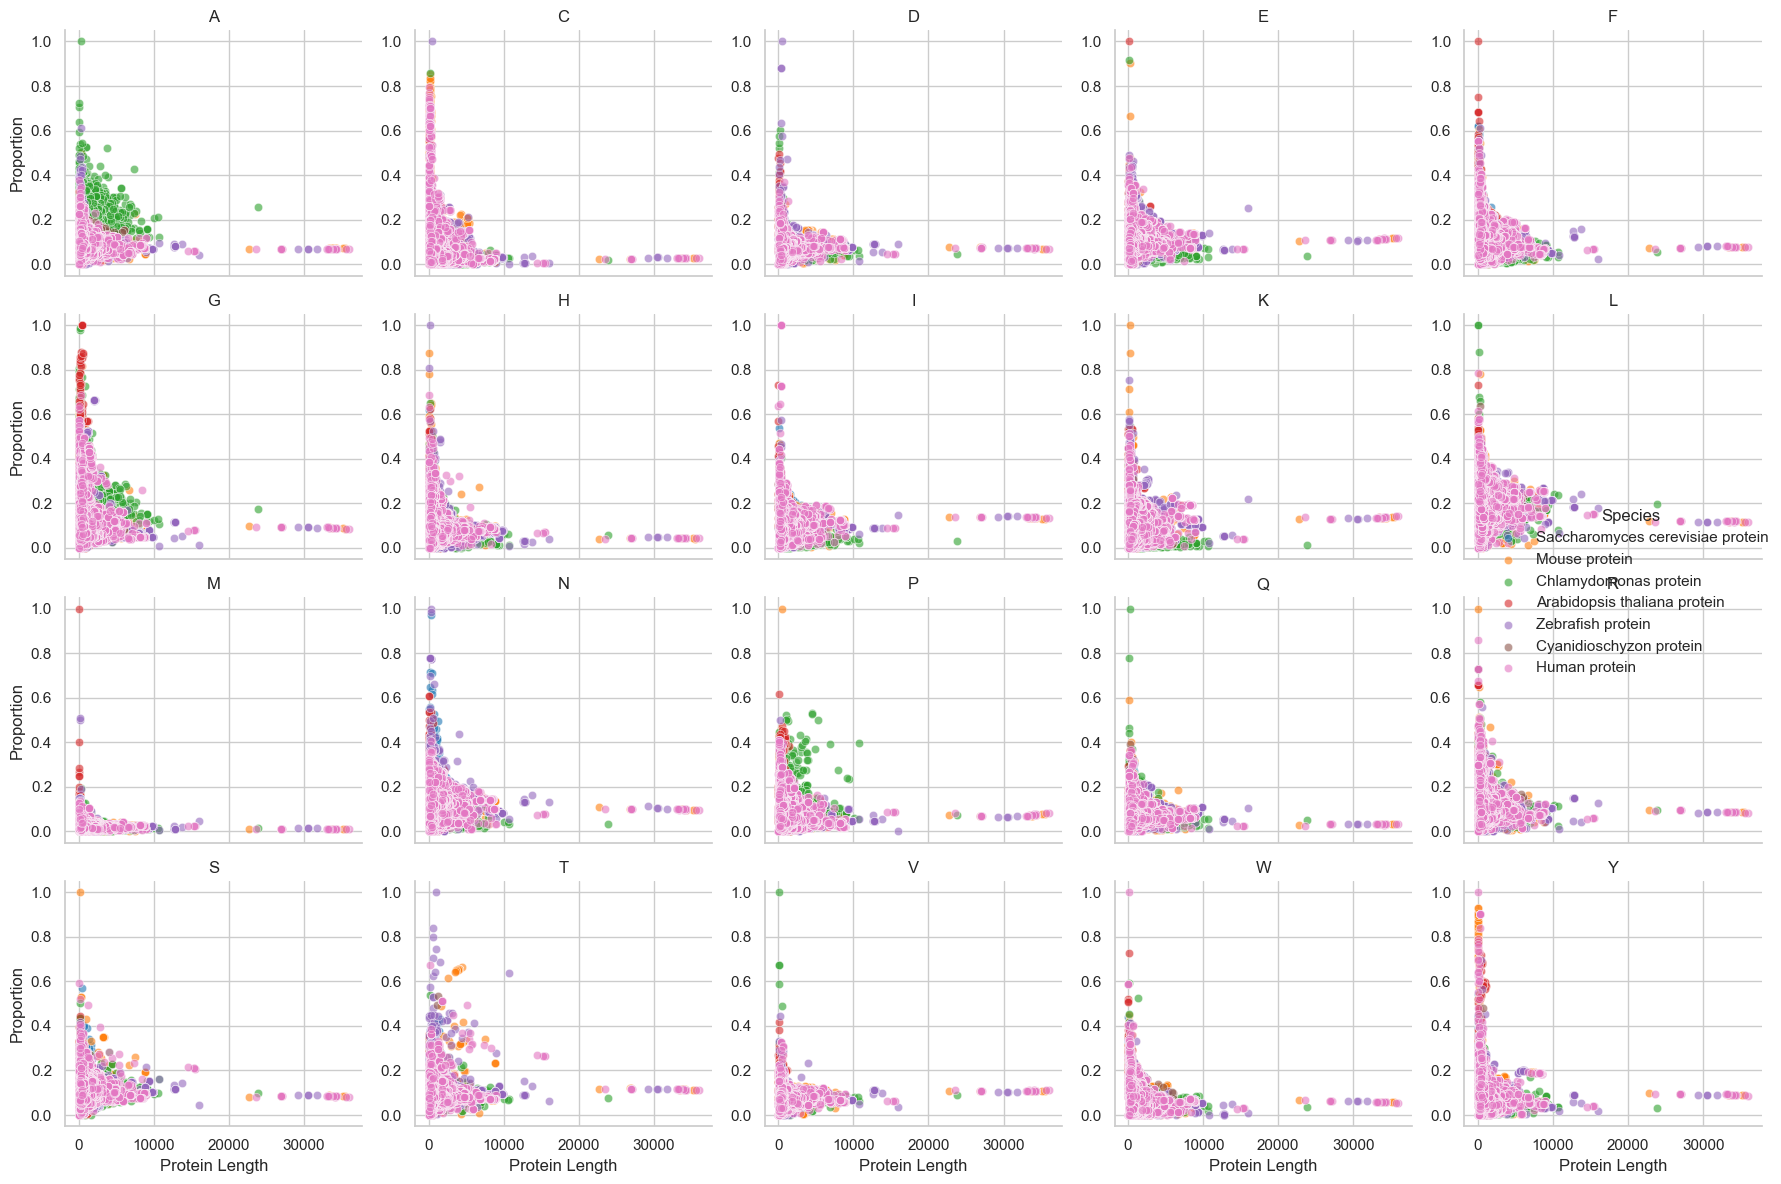

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_facet_grid_with_species(composition_df):
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # Expected amino acids
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]
    
    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return

    # Melt the DataFrame
    melted_df = composition_df.melt(id_vars=['Protein Length', 'Species'], 
                                    value_vars=available_amino_acids, 
                                    var_name='Amino Acid', 
                                    value_name='Proportion')

    # Facet grid
    g = sns.FacetGrid(melted_df, col='Amino Acid', col_wrap=5, height=3, sharey=False, hue='Species', palette='tab10')
    g.map(sns.scatterplot, 'Protein Length', 'Proportion', alpha=0.6)
    
    # Add legends and titles
    g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("Protein Length", "Proportion")
    
    plt.tight_layout()
    plt.show()

scatter_facet_grid_with_species(composition_df)


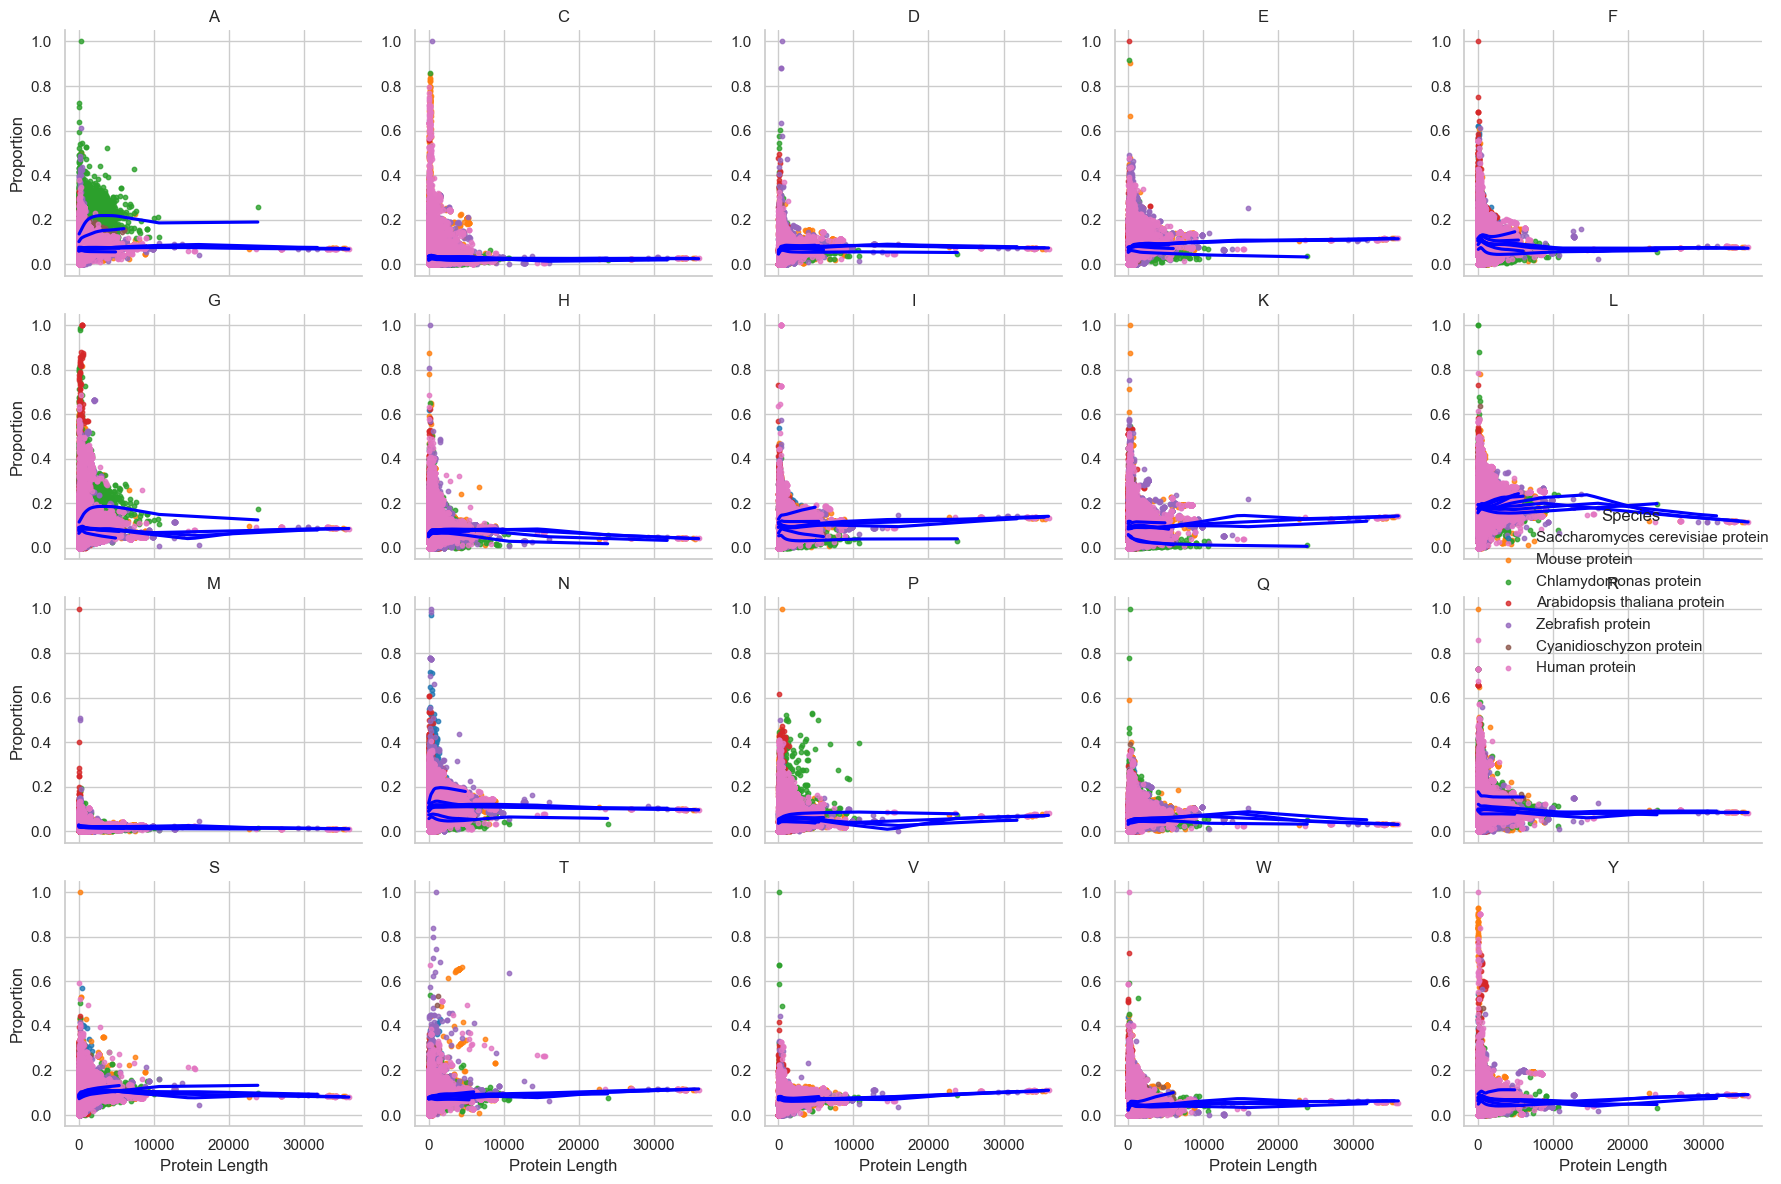

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

def facet_grid_with_trends(composition_df):
    # Check the actual amino acid columns present in the DataFrame
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # Expected amino acids
    
    # Ensure we only include the columns that are actually present in the DataFrame
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]
    
    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return

    # Melt the DataFrame for easier plotting, including Species for hue (color)
    melted_df = composition_df.melt(id_vars=['Protein Length', 'Species'], 
                                    value_vars=available_amino_acids, 
                                    var_name='Amino Acid', 
                                    value_name='Proportion')

    # Create the facet grid with color based on species
    g = sns.FacetGrid(melted_df, col='Amino Acid', col_wrap=5, height=3, sharey=False, hue='Species', palette='tab10')

    # Use regplot to add linear regression and Lowess smoothing
    g.map(sns.regplot, 'Protein Length', 'Proportion', scatter_kws={'s': 10}, line_kws={'color': 'blue'}, lowess=True)
    
    # Add legends and titles
    g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("Protein Length", "Proportion")
    
    plt.tight_layout()
    plt.show()

# Run the updated facet grid function with trends (linear regression + lowess)
# facet_grid_with_trends(composition_df)


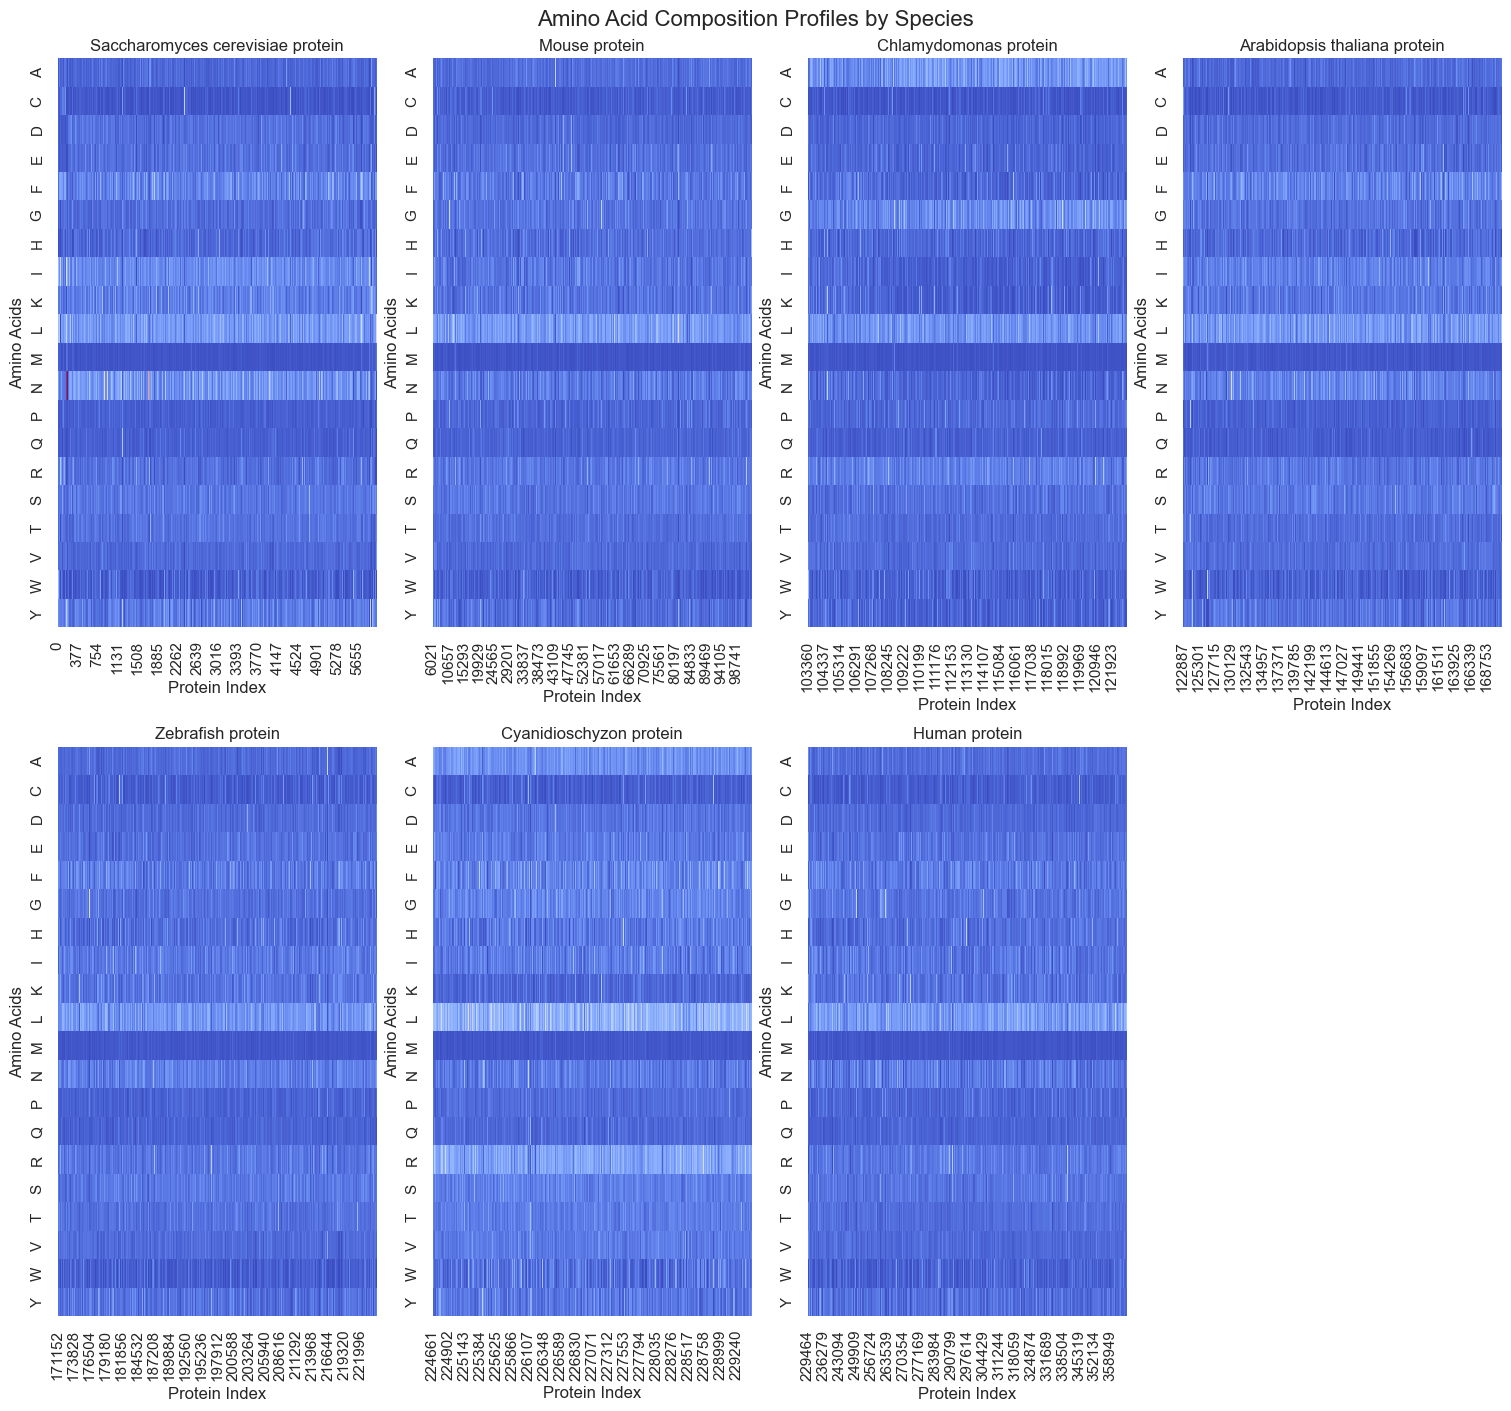

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def facet_heatmap_by_species(composition_df):
    # Select the amino acid columns
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids
    
    # Ensure only available amino acids are included
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return
    
    # Melt the data to prepare for facetting, keeping Species as identifier
    melted_df = composition_df.melt(id_vars=['Protein Length', 'Species'], 
                                    value_vars=available_amino_acids, 
                                    var_name='Amino Acid', 
                                    value_name='Proportion')

    # Create a grid where each species will have its own heatmap
    species_list = composition_df['Species'].unique()
    num_species = len(species_list)
    
    # Define the number of columns for the facet grid
    col_wrap = 4  # Adjust based on how many species you have

    # Initialize the grid for facets
    fig, axes = plt.subplots(nrows=(num_species // col_wrap) + 1, ncols=col_wrap, figsize=(15, num_species * 2), constrained_layout=True)
    axes = axes.flatten()  # Flatten for easy iteration

    for i, species in enumerate(species_list):
        species_data = composition_df[composition_df['Species'] == species]
        
        # Extract amino acid composition and transpose the data for heatmap
        heatmap_data = species_data[available_amino_acids].T
        
        # Plot the heatmap for each species
        sns.heatmap(heatmap_data, ax=axes[i], cmap='coolwarm', cbar=False)
        axes[i].set_title(species)
        axes[i].set_xlabel('Protein Index')
        axes[i].set_ylabel('Amino Acids')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle('Amino Acid Composition Profiles by Species', fontsize=16)
    plt.show()

# Run the function to plot faceted heatmaps
facet_heatmap_by_species(composition_df)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def hierarchical_clustering_composition(composition_df):
    # Select amino acid columns
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids

    # Ensure only available amino acids are included
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return
    
    # Extract amino acid composition data for clustering
    clustering_data = composition_df[available_amino_acids]
    
    # Add species information to the row labels (optional)
    row_labels = composition_df['Species'] + "_" + composition_df.index.astype(str)

    # Create the clustermap
    sns.clustermap(clustering_data, metric="euclidean", method="average", 
                   cmap="coolwarm", standard_scale=1, row_cluster=True, col_cluster=True, 
                   yticklabels=row_labels, figsize=(10, 8))

    plt.title("Hierarchical Clustering of Amino Acid Composition")
    plt.show()

# Run the function to create a hierarchical clustering clustermap
# hierarchical_clustering_composition(composition_df)

# The kernal crashed lmao


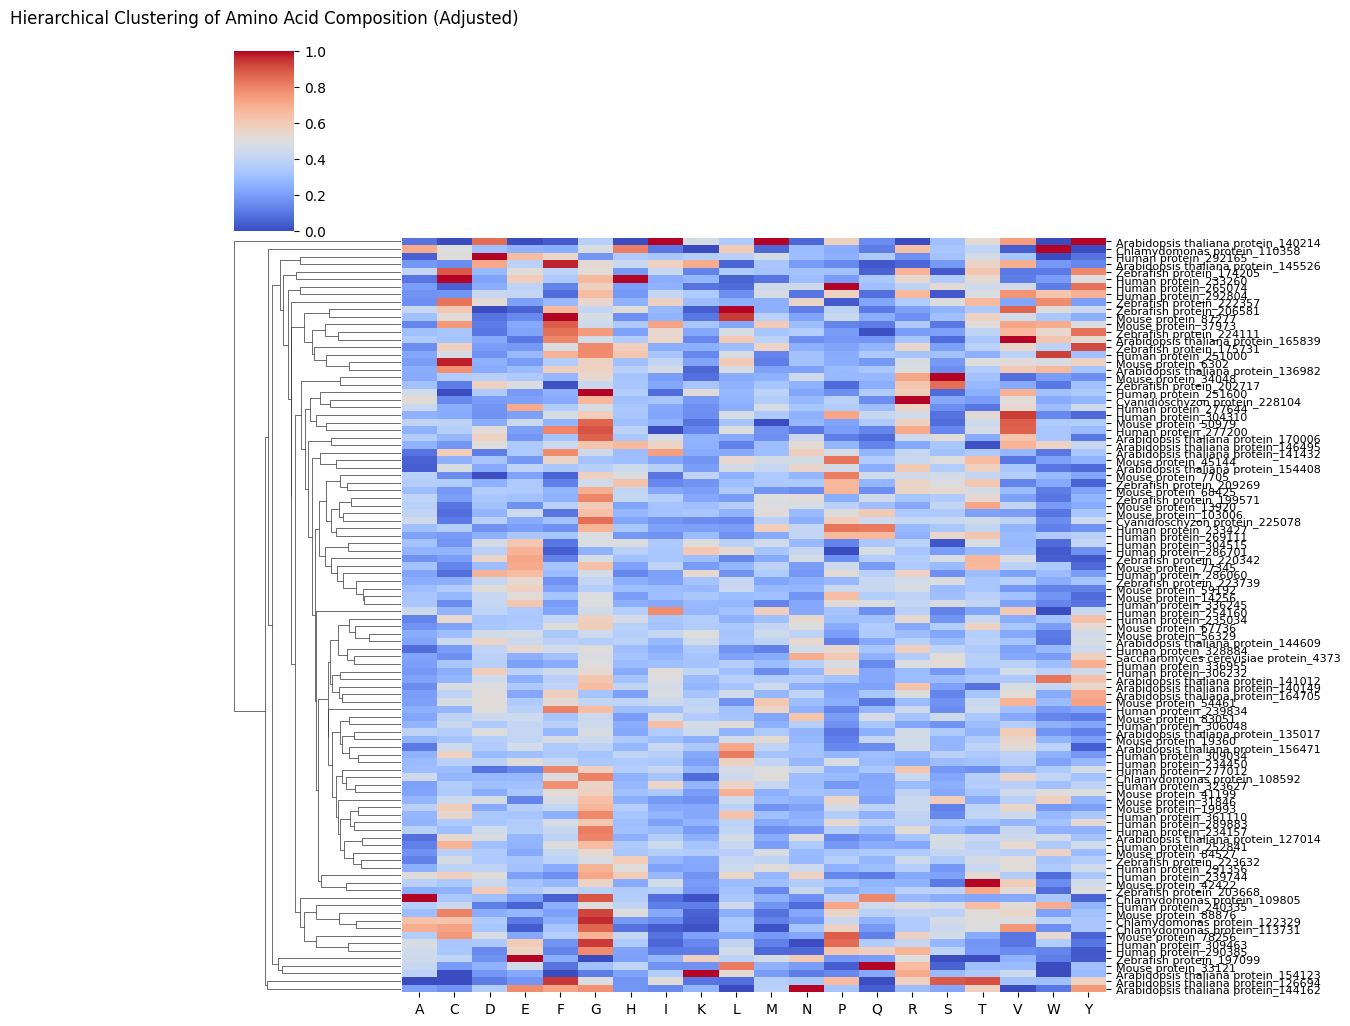

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def hierarchical_clustering_composition_adjusted(composition_df, sample_size=None):
    # Select amino acid columns
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids
    
    # Ensure only available amino acids are included
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return
    
    # If sample_size is provided, randomly sample the data to reduce size
    if sample_size and sample_size < len(composition_df):
        composition_df = composition_df.sample(n=sample_size, random_state=42)

    # Extract amino acid composition data for clustering
    clustering_data = composition_df[available_amino_acids]

    # Add species and index information to the row labels (optional)
    row_labels = composition_df['Species'] + "_" + composition_df.index.astype(str)

    # Create the clustermap, clustering only rows (proteins)
    g = sns.clustermap(clustering_data, metric="euclidean", method="average", 
                       cmap="coolwarm", standard_scale=1, row_cluster=True, col_cluster=False, 
                       yticklabels=row_labels, figsize=(12, 10))  # Increase figsize
    
    # Rotate y-axis labels to make them more readable and reduce font size
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8, rotation=0)
    
    plt.title("Hierarchical Clustering of Amino Acid Composition (Adjusted)", pad=20)
    plt.show()

# Run the adjusted hierarchical clustering function with label adjustments
hierarchical_clustering_composition_adjusted(composition_df, sample_size=100)

# Less memmory usage than above one



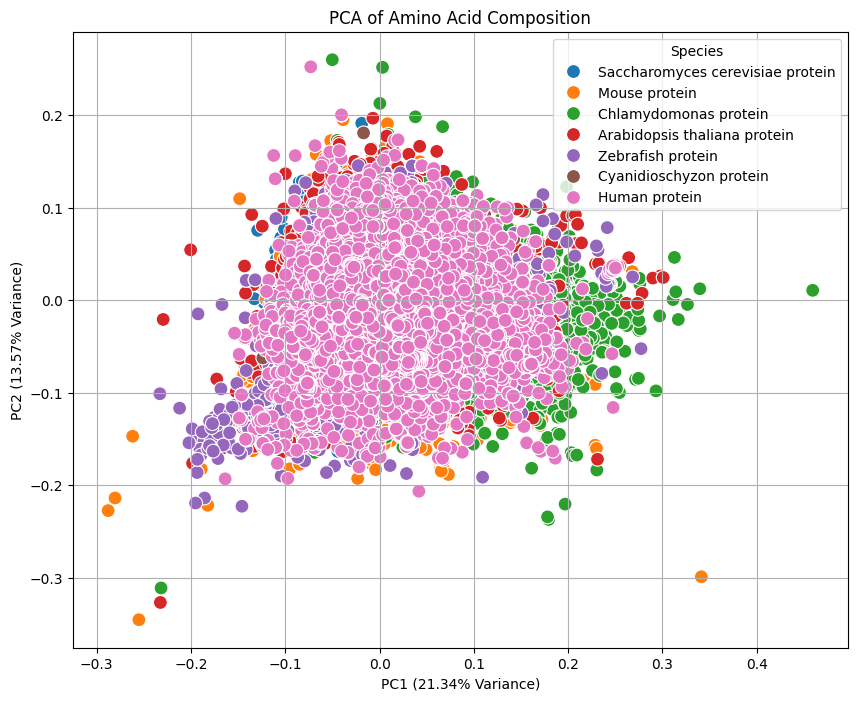

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_pca_amino_acids(composition_df):
    # Select the amino acid columns
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids

    # Ensure only available amino acids are included
    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return

    # Extract amino acid composition data for PCA
    amino_acid_data = composition_df[available_amino_acids]

    # Perform PCA
    pca = PCA(n_components=2)  # Project down to 2 dimensions for visualization
    pca_result = pca.fit_transform(amino_acid_data)
    
    # Create a DataFrame to store PCA results along with species information
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    pca_df['Species'] = composition_df['Species']

    # Plot the PCA result
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='tab10', s=100)
    
    # Add plot details
    plt.title('PCA of Amino Acid Composition')
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}% Variance)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}% Variance)")
    plt.legend(loc='best', title='Species')
    plt.grid(True)
    plt.show()

# Run the PCA visualization function
visualize_pca_amino_acids(composition_df)


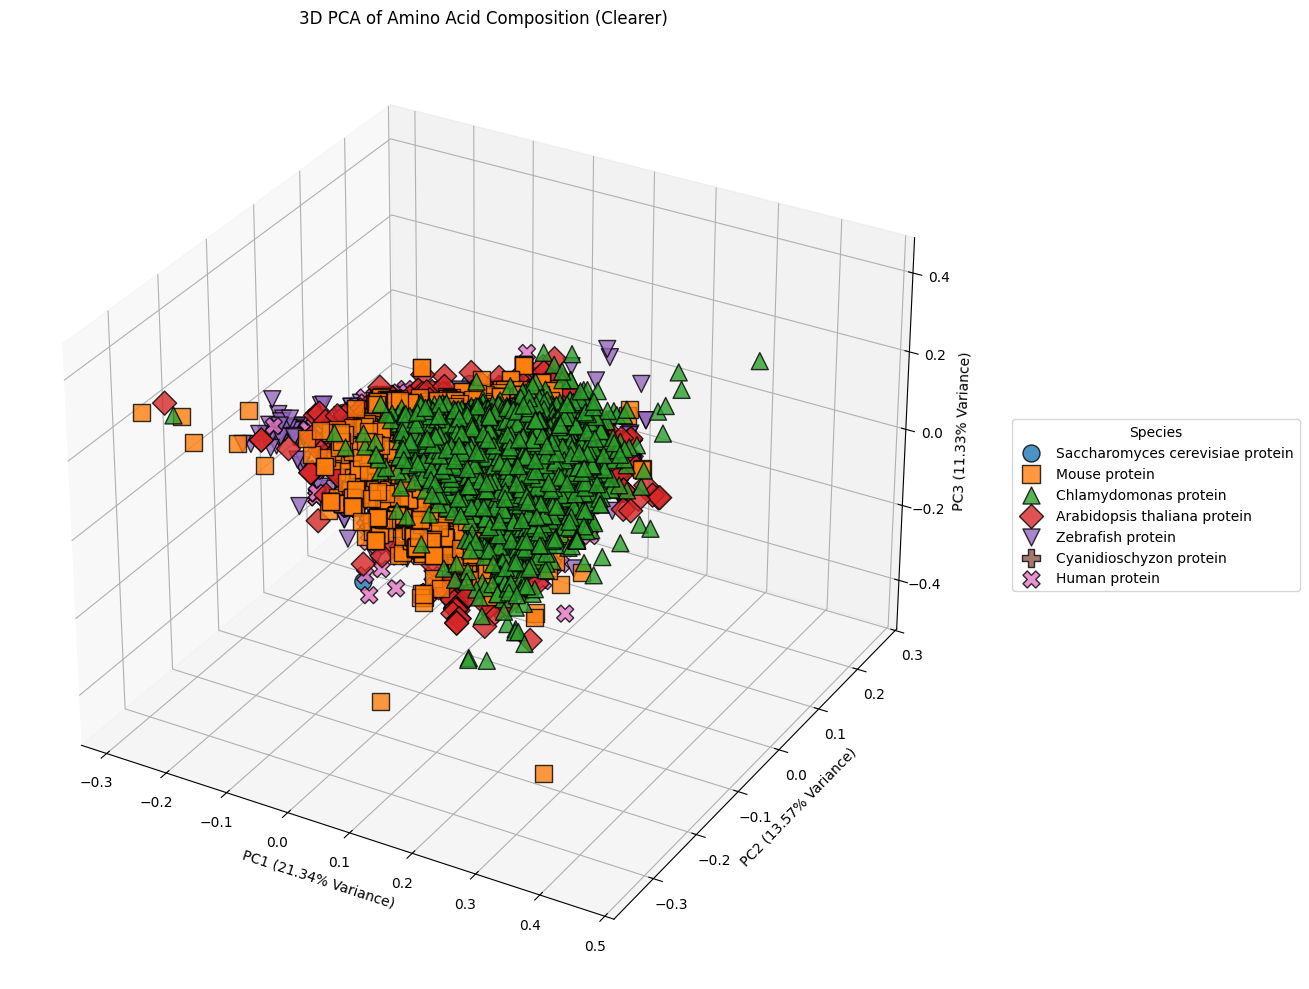

In [13]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_pca_amino_acids_clearer(composition_df):
    # Select the amino acid columns
    amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')

    available_amino_acids = [aa for aa in amino_acid_columns if aa in composition_df.columns]

    if not available_amino_acids:
        print("No amino acid columns found in the DataFrame.")
        return

    # Extract amino acid composition data for PCA
    amino_acid_data = composition_df[available_amino_acids]

    # Perform PCA
    pca = PCA(n_components=3)  # Project to 3 dimensions
    pca_result = pca.fit_transform(amino_acid_data)

    # Create a DataFrame to store PCA results along with species information
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
    pca_df['Species'] = composition_df['Species']

    # 3D plot
    fig = plt.figure(figsize=(12, 10))  # Increase figure size
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each species in the 3D space
    species_unique = pca_df['Species'].unique()
    colors = sns.color_palette('tab10', len(species_unique))
    markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']  # List of distinct markers for each species

    for i, species in enumerate(species_unique):
        species_data = pca_df[pca_df['Species'] == species]
        ax.scatter(species_data['PC1'], species_data['PC2'], species_data['PC3'], 
                   color=colors[i], label=species, s=150, alpha=0.8,  # Increase point size and add transparency
                   edgecolor='k', marker=markers[i % len(markers)])  # Add edge color and distinct markers

    # Add labels and title
    ax.set_title('3D PCA of Amino Acid Composition (Clearer)')
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}% Variance)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}% Variance)")
    ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2] * 100:.2f}% Variance)")

    # Adjust the layout
    plt.tight_layout()  # Automatically adjust the layout to prevent text from being cropped

    # Move the legend outside the plot to avoid overlapping
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='Species')

    # Show the plot
    plt.show()

# Run the updated clearer 3D PCA visualization function
visualize_3d_pca_amino_acids_clearer(composition_df)


# 4 Compare the seven species in terms of amino acid composition of proteins.

In [14]:
# Define representative length bins
df['Length Category'] = pd.qcut(df['Protein Length'], q=3, labels=['Short', 'Medium', 'Long'])

# Ensure the composition dataframe has length category and species
composition_df['Length Category'] = df['Length Category']

# Group by Species and Length Category to calculate mean amino acid composition
grouped_composition = composition_df.groupby(['Species', 'Length Category']).mean().reset_index()

# Melt the dataframe for easier plotting with seaborn
melted_composition = grouped_composition.melt(id_vars=['Species', 'Length Category'], 
                                              value_vars=list('ACDEFGHIKLMNPQRSTVWY'),
                                              var_name='Amino Acid', value_name='Composition')


/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_9585/2716310109.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_composition = composition_df.groupby(['Species', 'Length Category']).mean().reset_index()


/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_9585/2785886418.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_composition = composition_df.groupby(['Species', 'Length Category']).mean().reset_index()


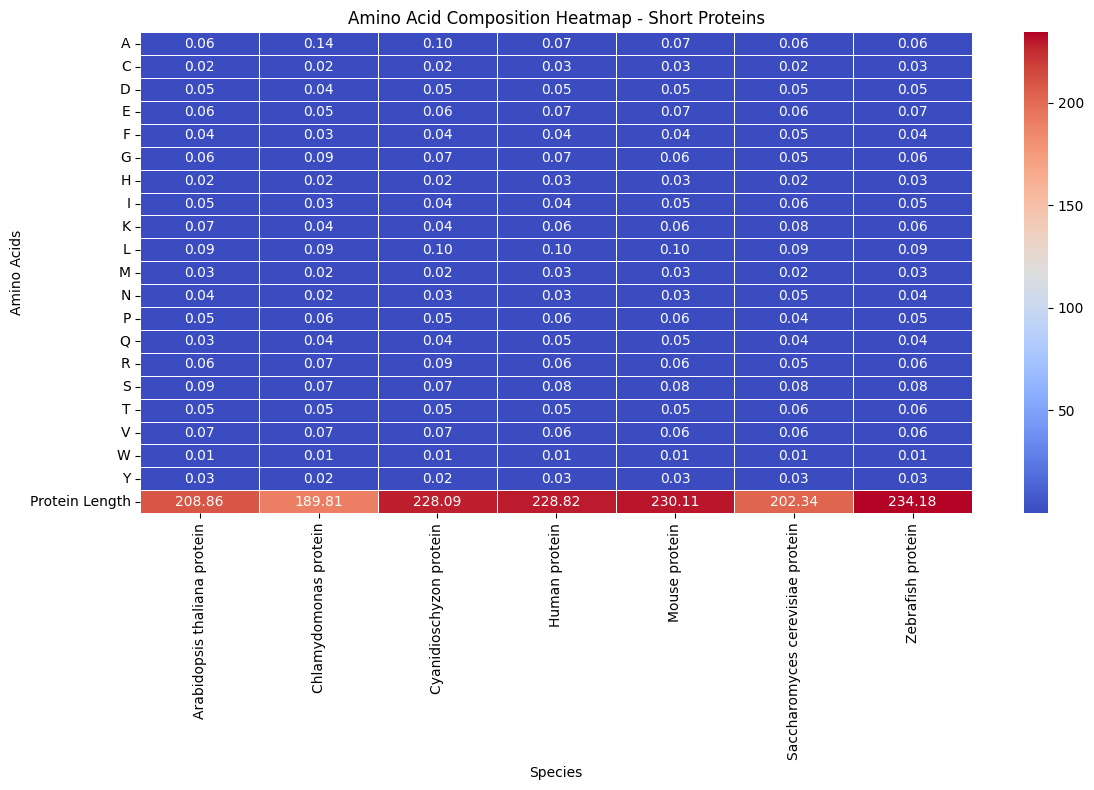

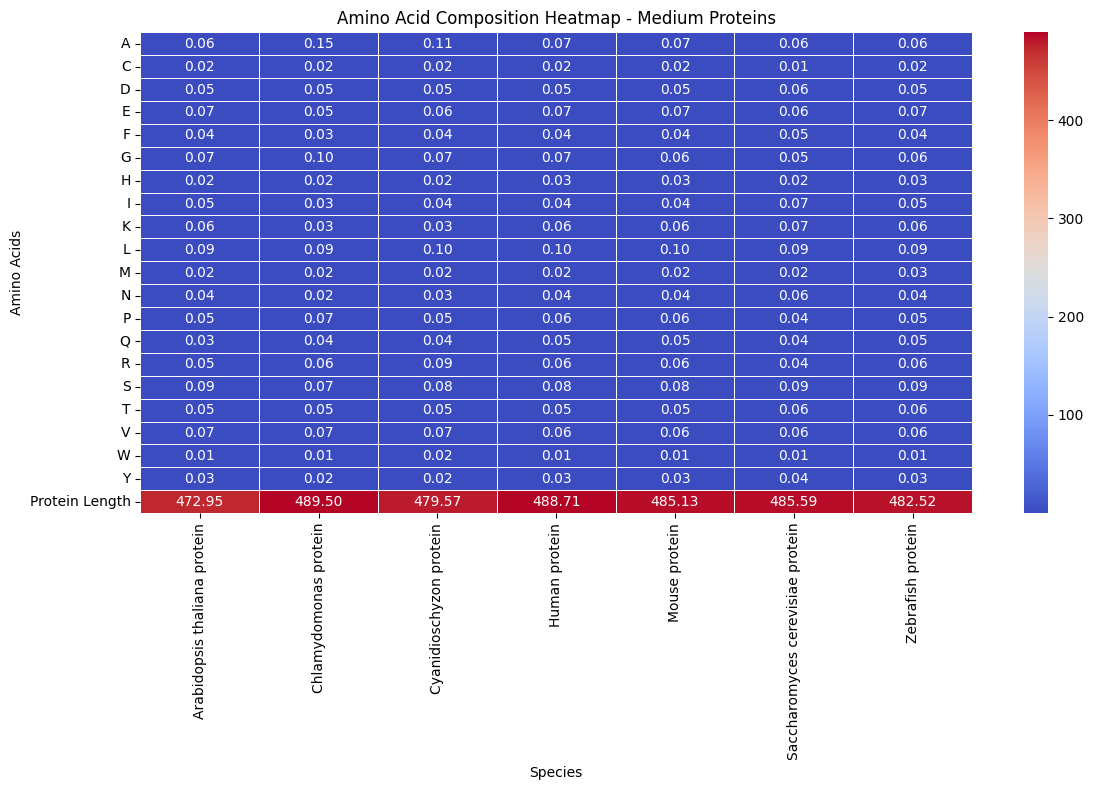

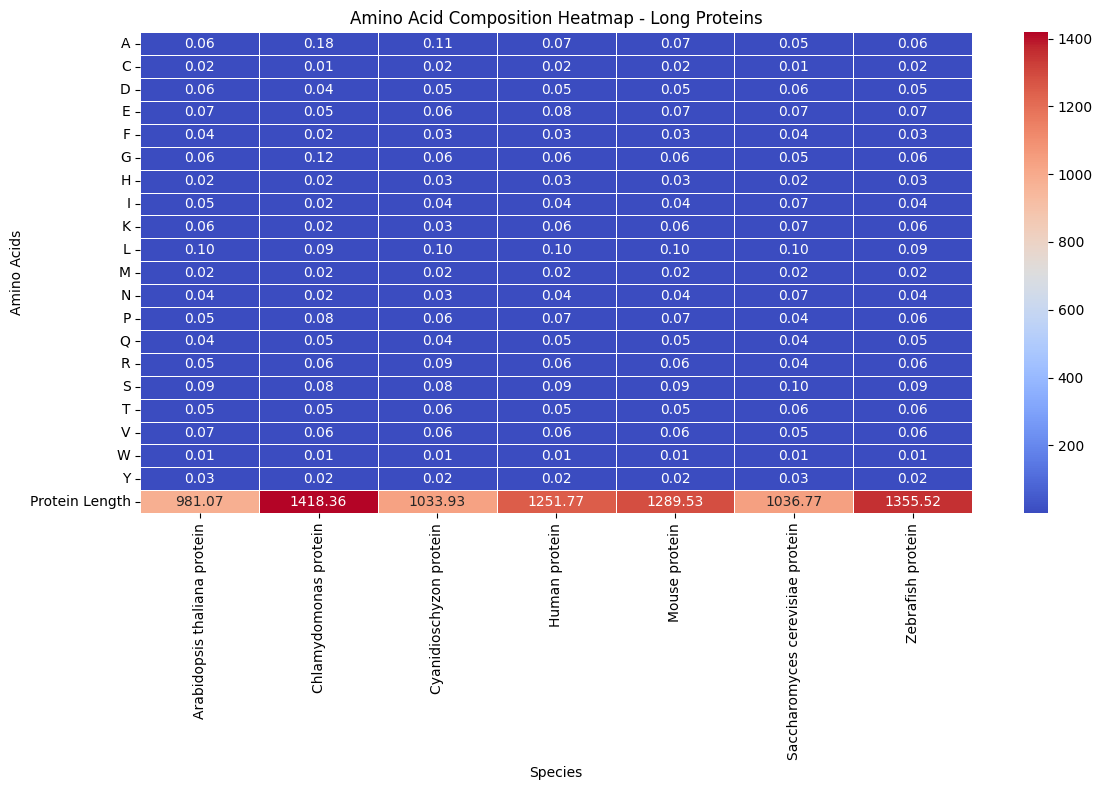

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Species and Length Category and calculate mean amino acid composition
grouped_composition = composition_df.groupby(['Species', 'Length Category']).mean().reset_index()

# Now let's plot a heatmap for each Length Category and Species comparison
# Pivot the data to make it suitable for heatmap plotting
for length_category in ['Short', 'Medium', 'Long']:
    plt.figure(figsize=(12, 8))
    subset = grouped_composition[grouped_composition['Length Category'] == length_category]
    
    # Drop non-amino acid columns
    subset = subset.set_index('Species')
    subset = subset.drop(columns=['Length Category'])

    # Create a heatmap
    sns.heatmap(subset.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    
    plt.title(f'Amino Acid Composition Heatmap - {length_category} Proteins')
    plt.xlabel('Species')
    plt.ylabel('Amino Acids')
    
    plt.tight_layout()
    plt.show()


/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_9585/2240995939.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_9585/2240995939.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/yw/bg8nnxbs2tv4pz7s83z6djjw0000gn/T/ipykernel_9585/2240995939.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


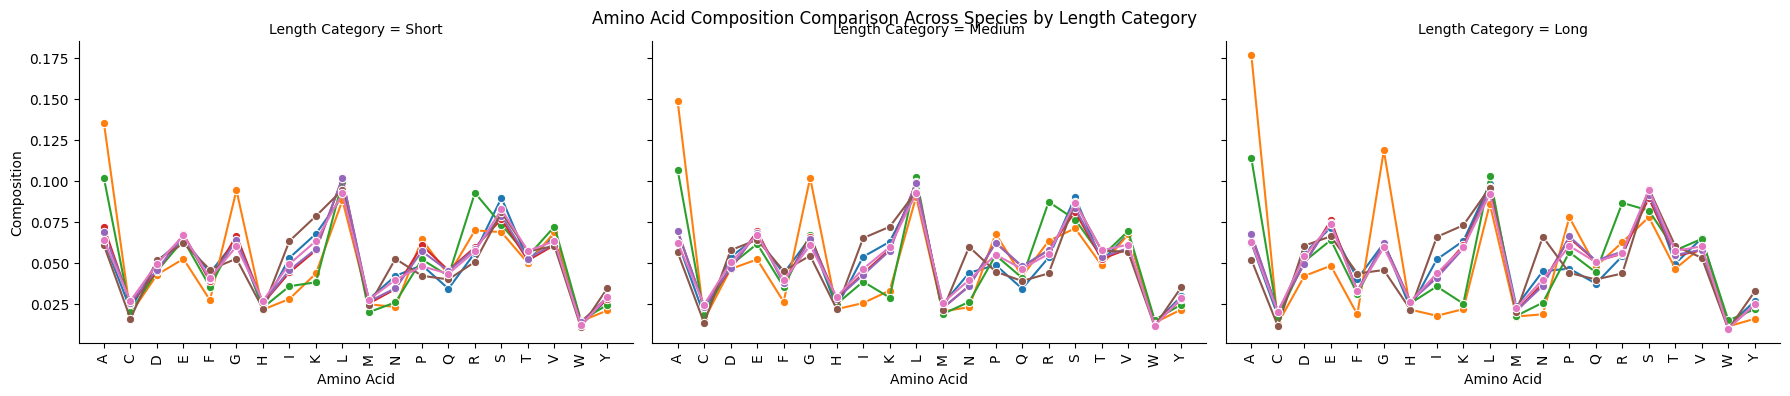

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to visualize amino acid composition across species and length categories using line plots
g = sns.FacetGrid(melted_composition, col='Length Category', height=4, aspect=1.5)

# Use a line plot to show amino acid composition for each amino acid and length category
g.map_dataframe(sns.lineplot, 'Amino Acid', 'Composition', hue='Species', marker='o')

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.fig.subplots_adjust(top=0.9)  # Adjust top to prevent overlap
g.fig.suptitle('Amino Acid Composition Comparison Across Species by Length Category')

plt.show()


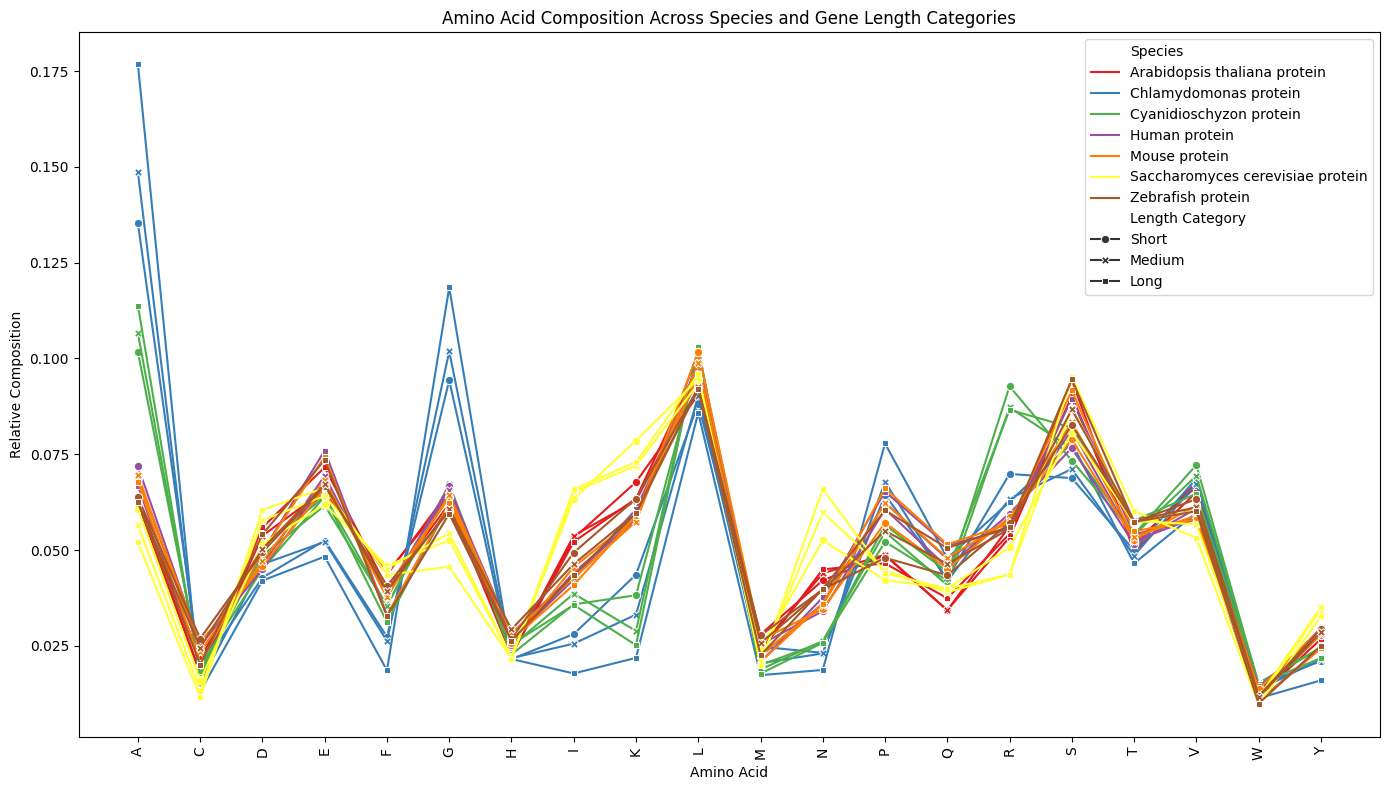

In [17]:
# Melt the DataFrame for easier plotting
melted_composition = grouped_composition.melt(id_vars=['Species', 'Length Category'], 
                                              value_vars=list('ACDEFGHIKLMNPQRSTVWY'),
                                              var_name='Amino Acid', value_name='Composition')

# Line plot to show trends in amino acid composition across species and lengths
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_composition, x='Amino Acid', y='Composition', hue='Species', 
             style='Length Category', markers=True, dashes=False, palette='Set1')

# Adjusting labels and title
plt.xticks(rotation=90)
plt.title('Amino Acid Composition Across Species and Gene Length Categories')
plt.xlabel('Amino Acid')
plt.ylabel('Relative Composition')

plt.tight_layout()
plt.show()


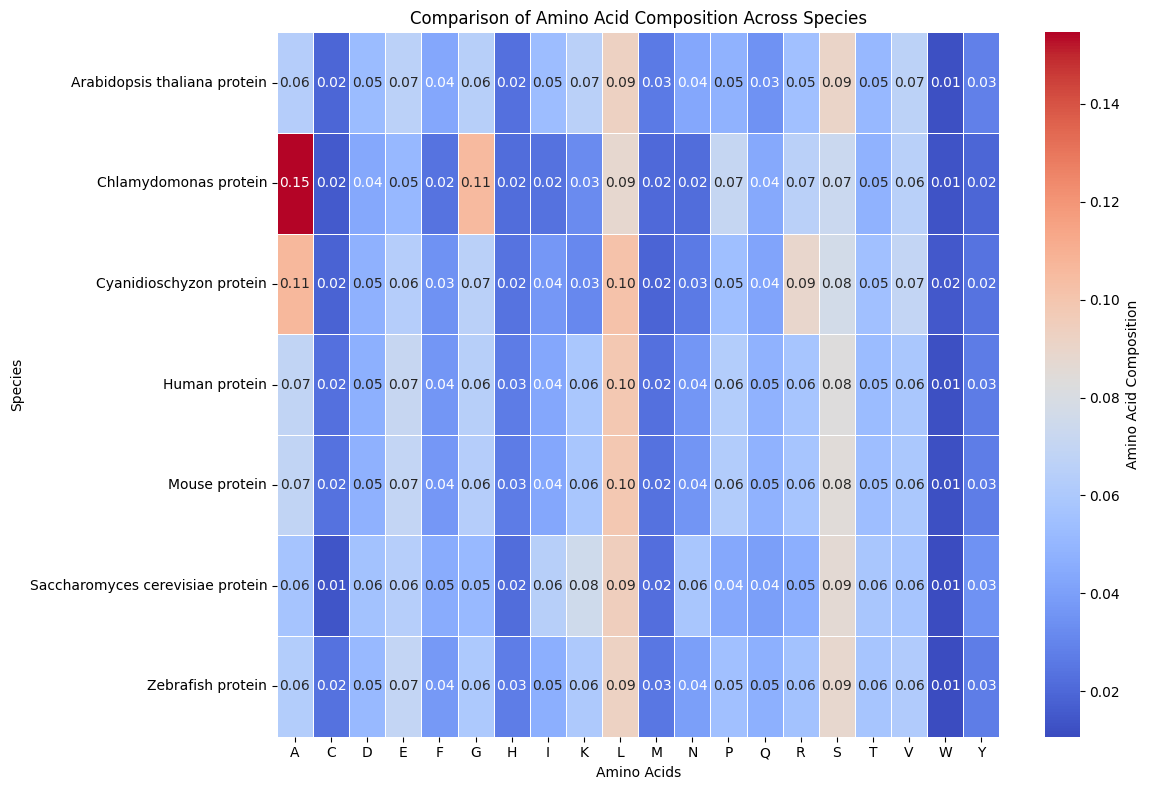

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure amino acid composition DataFrame only contains numerical values for averaging
# First, check the columns to ensure we are focusing on the amino acid compositions
amino_acid_columns = list('ACDEFGHIKLMNPQRSTVWY')  # The 20 amino acids

# Group by Species and calculate the mean for the amino acid columns only
species_composition = composition_df.groupby('Species')[amino_acid_columns].mean()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(species_composition, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"label": "Amino Acid Composition"})

# Set plot labels and title
plt.title('Comparison of Amino Acid Composition Across Species')
plt.xlabel('Amino Acids')
plt.ylabel('Species')

# Adjust layout
plt.tight_layout()
plt.show()
